# **Import libraries needed**

In [1]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import itertools
import seaborn as sns
import pyodbc
import pygrametl

# Import the dataset

In [2]:
#Connect to the Staging Area
myconn = pyodbc.connect(r'Driver=SQL Server;Server=LAPTOP-JVHJP0A7;Database=SA_SALES;Trusted_Connection=yes;')
cursor = myconn.cursor()
connection = pygrametl.ConnectionWrapper(myconn)

connection.setasdefault()

In [3]:
#!pip install xlrd

In [4]:
!pip install xlrd

In [5]:
# import data
df = pd.read_sql_query("select * from dbo.ORDERS", con=myconn)
df.rename(columns = {'RowIDS':'Row ID', 'ORDERIDS':'Order ID', 'ShipDateS':'Ship Date', 'ShipModeS':'Ship Mode',
       'Customer_IDS':'Customer ID', 'CustomerNameS':'Customer Name', 'SegmentS':'Segment', 'CityS':'City', 'StateS':'State','CountryS':'Country',
       'Country':'CountryS', 'RegionS':'Region', 'MarketS':'Market', 'ProductIDS':'Product ID', 'CategoryS':'Category',
       'Sub-CategoryS':'Sub-Category', 'Product NameS':'Product Name', 'PostalCodeS':'Postal Code','OrderDateS':'Order Date'},inplace=True)
df.head()

Row ID                  Order ID  Order Date   Ship Date       Ship Mode  \
0  27932   IN-2012-FW1439511-41196  2012-10-14  2012-10-19  Standard Class   
1  33738  CA-2014-AF10870140-41782  2014-05-23  2014-05-28  Standard Class   
2  39497  CA-2015-AF10870140-42119  2015-04-25  2015-05-01  Standard Class   
3  47536    MO-2015-MC759086-42033  2015-01-29  2015-02-01    Second Class   
4  40965  CA-2014-AF10870140-41753  2014-04-24  2014-04-28  Standard Class   

    Customer ID   Customer Name    Segment          City  \
0    FW-1439511  Fred Wasserman  Corporate         Dhaka   
1  AF-108701406    Art Ferguson   Consumer       Passaic   
2  AF-108701402    Art Ferguson   Consumer       Chicago   
3     MC-759086  Matt Collister  Corporate         Rabat   
4  AF-108701404    Art Ferguson   Consumer  San Clemente   

                     State  ...         Category Sub-Category  \
0                    Dhaka  ...       Technology      Copiers   
1               New Jersey  ...        Furniture       Tables   
2                 Illinois  ...  Office Supplies      Storage   
3  Rabat-Salé-Zemmour-Zaer  ...       Technology  Accessories   
4               California  ...  Office Supplies    Envelopes   

                                        Product Name Quantity Discount  \
0                       Hewlett Fax Machine, Digital      3.0      0.0   
1                    Bevis 36 x 72 Conference Tables      2.0      0.3   
2              Safco Industrial Wire Shelving System      1.0      0.2   
3                  Memorex Memory Card, Programmable      4.0      0.0   
4  Recycled Interoffice Envelopes with String and...      3.0      0.0   

     Profit Shipping Cost  OrderPriority  Postal Code    Sales  
0  373.8600         80.93         Medium         None  958.680  
1  -19.9184          8.91         Medium         None  174.286  
2  -18.1960          5.88         Medium         None   72.784  
3   58.0800         80.80       Critical         None  415.080  
4   35.9850          5.86         Medium         None   71.970  

[5 rows x 24 columns]

In [6]:
#Show first five data points
df.head()

Row ID                  Order ID  Order Date   Ship Date       Ship Mode  \
0  27932   IN-2012-FW1439511-41196  2012-10-14  2012-10-19  Standard Class   
1  33738  CA-2014-AF10870140-41782  2014-05-23  2014-05-28  Standard Class   
2  39497  CA-2015-AF10870140-42119  2015-04-25  2015-05-01  Standard Class   
3  47536    MO-2015-MC759086-42033  2015-01-29  2015-02-01    Second Class   
4  40965  CA-2014-AF10870140-41753  2014-04-24  2014-04-28  Standard Class   

    Customer ID   Customer Name    Segment          City  \
0    FW-1439511  Fred Wasserman  Corporate         Dhaka   
1  AF-108701406    Art Ferguson   Consumer       Passaic   
2  AF-108701402    Art Ferguson   Consumer       Chicago   
3     MC-759086  Matt Collister  Corporate         Rabat   
4  AF-108701404    Art Ferguson   Consumer  San Clemente   

                     State  ...         Category Sub-Category  \
0                    Dhaka  ...       Technology      Copiers   
1               New Jersey  ...        Furniture       Tables   
2                 Illinois  ...  Office Supplies      Storage   
3  Rabat-Salé-Zemmour-Zaer  ...       Technology  Accessories   
4               California  ...  Office Supplies    Envelopes   

                                        Product Name Quantity Discount  \
0                       Hewlett Fax Machine, Digital      3.0      0.0   
1                    Bevis 36 x 72 Conference Tables      2.0      0.3   
2              Safco Industrial Wire Shelving System      1.0      0.2   
3                  Memorex Memory Card, Programmable      4.0      0.0   
4  Recycled Interoffice Envelopes with String and...      3.0      0.0   

     Profit Shipping Cost  OrderPriority  Postal Code    Sales  
0  373.8600         80.93         Medium         None  958.680  
1  -19.9184          8.91         Medium         None  174.286  
2  -18.1960          5.88         Medium         None   72.784  
3   58.0800         80.80       Critical         None  415.080  
4   35.9850          5.86         Medium         None   71.970  

[5 rows x 24 columns]

In [7]:
#Check for missing values
df.isna().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Region               0
Market               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
OrderPriority        0
Postal Code      51290
Sales                0
dtype: int64

In [8]:
#Check the different types of product categories included
df['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [9]:
#Now we create a dataframe which includes only data related to furniture sales. 
furniture = df.loc[df['Category'] == 'Furniture']
furniture

Row ID                  Order ID  Order Date   Ship Date  \
1      33738  CA-2014-AF10870140-41782  2014-05-23  2014-05-28   
7      17904  ES-2015-BW11110120-42046  2015-02-11  2015-02-15   
9       1898   MX-2015-JD1615018-42167  2015-06-12  2015-06-12   
10      8768   MX-2012-JO1555082-41150  2012-08-29  2012-09-02   
14     21585   IN-2012-JK1532527-41030  2012-05-01  2012-05-02   
...      ...                       ...         ...         ...   
51281   7302   MX-2015-CJ1201082-42187  2015-07-02  2015-07-09   
51283  17627   ES-2013-JP1552048-41619  2013-12-11  2013-12-12   
51285  26583  ID-2014-CL12700144-41803  2014-06-13  2014-06-15   
51286  11713  IT-2012-JS15685139-41066  2012-06-06  2012-06-07   
51287  13591   IT-2014-JD1615048-41846  2014-07-26  2014-07-31   

            Ship Mode   Customer ID      Customer Name      Segment  \
1      Standard Class  AF-108701406       Art Ferguson     Consumer   
7      Standard Class   BW-11110120       Bart Watters    Corporate   
9            Same Day    JD-1615018   Justin Deggeller    Corporate   
10       Second Class    JO-1555082       Jesus Ocampo  Home Office   
14        First Class    JK-1532527  Jason Klamczynski    Corporate   
...               ...           ...                ...          ...   
51281  Standard Class    CJ-1201082    Caroline Jumper     Consumer   
51283     First Class    JP-1552048      Jeremy Pistek     Consumer   
51285     First Class   CL-12700144       Craig Leslie  Home Office   
51286     First Class   JS-15685139           Jim Sink    Corporate   
51287  Standard Class    JD-1615048   Justin Deggeller    Corporate   

                   City             State  ...   Category Sub-Category  \
1               Passaic        New Jersey  ...  Furniture       Tables   
7                Oviedo          Asturias  ...  Furniture  Furnishings   
9               Itapevi         São Paulo  ...  Furniture  Furnishings   
10              Tijuana   Baja California  ...  Furniture       Tables   
14               Suzhou             Anhui  ...  Furniture       Chairs   
...                 ...               ...  ...        ...          ...   
51281           Córdoba          Veracruz  ...  Furniture       Chairs   
51283            Munich           Bavaria  ...  Furniture    Bookcases   
51285  Ho Chi Minh City  Ho Chi Minh City  ...  Furniture       Tables   
51286         Worcester           England  ...  Furniture    Bookcases   
51287         Oldenburg      Lower Saxony  ...  Furniture       Tables   

                                     Product Name Quantity Discount    Profit  \
1                 Bevis 36 x 72 Conference Tables      2.0     0.30  -19.9184   
7                     Advantus Photo Frame, Black     13.0     0.00    6.6300   
9                            Eldon Frame, Durable      5.0     0.00  105.7000   
10      Chromcraft Round Table, Adjustable Height      2.0     0.20   31.2560   
14              Harbour Creations Bag Chairs, Red      4.0     0.00   93.6000   
...                                           ...      ...      ...       ...   
51281     SAFCO Executive Leather Armchair, Black      3.0     0.20  128.5200   
51283           Ikea 3-Shelf Cabinet, Traditional      6.0     0.10  299.0160   
51285           Bevis Wood Table, Fully Assembled      2.0     0.57 -117.7512   
51286             Dania Floating Shelf Set, Metal      3.0     0.00  192.4200   
51287  Chromcraft Wood Table, with Bottom Storage      3.0     0.35 -202.7160   

      Shipping Cost  OrderPriority  Postal Code     Sales  
1             8.910         Medium         None  174.2860  
7            80.770           High         None  688.7400  
9            80.736           High         None  377.6000  
10           80.713           High         None  500.5760  
14           80.660       Critical         None  246.4800  
...             ...            ...          ...       ...  
51281        81.039         Medium         None  734.4000  
51283        81.02

In [10]:
#Know the earliest date recorded
furniture['Order Date'].min()

'2012-01-01'

In [11]:
#Know the most recent date recorded
furniture['Order Date'].max()

'2015-12-31'

# Data Processing

In [12]:
#Now we can remove unnecessary columns from the furniture dataframe
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture

Order Date        Market  Shipping Cost OrderPriority     Sales
1      2014-05-23          USCA          8.910        Medium  174.2860
7      2015-02-11        Europe         80.770          High  688.7400
9      2015-06-12         LATAM         80.736          High  377.6000
10     2012-08-29         LATAM         80.713          High  500.5760
14     2012-05-01  Asia Pacific         80.660      Critical  246.4800
...           ...           ...            ...           ...       ...
51281  2015-07-02         LATAM         81.039        Medium  734.4000
51283  2013-12-11        Europe         81.020          High  769.1760
51285  2014-06-13  Asia Pacific         80.980          High  460.1688
51286  2012-06-06        Europe         80.970        Medium  506.4300
51287  2014-07-26        Europe         80.970        Medium  940.9140

[9860 rows x 5 columns]

In [13]:
#Now let's sort furniture datframe according to order date
furniture = furniture.sort_values('Order Date')
furniture

Order Date        Market  Shipping Cost OrderPriority      Sales
16685  2012-01-01  Asia Pacific          4.700        Medium   113.6700
51267  2012-01-03  Asia Pacific         81.260          High   666.8400
5067   2012-01-03  Asia Pacific         21.320          High   211.1805
7823   2012-01-03  Asia Pacific         10.070           Low   159.4440
31546  2012-01-03  Asia Pacific          8.170           Low    68.8680
...           ...           ...            ...           ...        ...
50953  2015-12-31  Asia Pacific         86.860          High  1048.7313
35479  2015-12-31          USCA         38.270          High   323.1360
3756   2015-12-31  Asia Pacific         13.720        Medium   173.7600
40734  2015-12-31  Asia Pacific          4.120        Medium   364.5900
27189  2015-12-31         LATAM         51.527          High   333.9000

[9860 rows x 5 columns]

In [14]:
#Now let's find how much total furniture sales occurred on each date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [15]:
furniture

Order Date      Sales
0     2012-01-01   113.6700
1     2012-01-03  1960.8225
2     2012-01-04  1686.7000
3     2012-01-05    48.7800
4     2012-01-06   324.4500
...          ...        ...
1327  2015-12-27  2815.0026
1328  2015-12-28   224.7000
1329  2015-12-29  9109.4028
1330  2015-12-30  9210.8869
1331  2015-12-31  3995.2371

[1332 rows x 2 columns]

In [16]:
#Now let's set the Order date column as the index column
furniture = furniture.set_index('Order Date')
furniture

Sales
Order Date           
2012-01-01   113.6700
2012-01-03  1960.8225
2012-01-04  1686.7000
2012-01-05    48.7800
2012-01-06   324.4500
...               ...
2015-12-27  2815.0026
2015-12-28   224.7000
2015-12-29  9109.4028
2015-12-30  9210.8869
2015-12-31  3995.2371

[1332 rows x 1 columns]

In [17]:
#Now let's see whether there is any frequency in the dataframe
furniture.index

Index(['2012-01-01', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
       '2012-01-07', '2012-01-08', '2012-01-10', '2012-01-11', '2012-01-12',
       ...
       '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
       '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', name='Order Date', length=1332)

In [18]:
#Now let's resample the data into means of monthly sales of furniture and save this into a new variable called Order date
furniture.index = pd.to_datetime(furniture.index)
y_furniture = furniture['Sales'].resample('MS').mean()

y_furniture

Order Date
2012-01-01    1325.528962
2012-02-01    1491.641146
2012-03-01    1678.219783
2012-04-01    1278.731046
2012-05-01    1777.452571
2012-06-01    2640.850083
2012-07-01    1364.476639
2012-08-01    2428.585846
2012-09-01    3354.774418
2012-10-01    3163.771044
2012-11-01    3448.512932
2012-12-01    4121.766997
2013-01-01    1474.527441
2013-02-01    1568.141392
2013-03-01    1967.226096
2013-04-01    2103.918158
2013-05-01    2331.075115
2013-06-01    2716.024737
2013-07-01    1536.718185
2013-08-01    2918.773897
2013-09-01    3434.485043
2013-10-01    2924.962890
2013-11-01    4009.302983
2013-12-01    3227.224647
2014-01-01    2820.848300
2014-02-01    2273.767088
2014-03-01    2332.974743
2014-04-01    2021.740085
2014-05-01    2656.101750
2014-06-01    4116.090768
2014-07-01    2477.720659
2014-08-01    4010.569750
2014-09-01    4403.471910
2014-10-01    3189.948518
2014-11-01    4385.811496
2014-12-01    4938.036307
2015-01-01    2492.838239
2015-02-01    2508.818696
2

In [19]:
#Now let's check the monthly sales value happened in year 2017
print(y_furniture['2015':])

Order Date
2015-01-01    2492.838239
2015-02-01    2508.818696
2015-03-01    3450.206981
2015-04-01    2351.695310
2015-05-01    3277.070130
2015-06-01    4861.539718
2015-07-01    2839.458793
2015-08-01    4510.137246
2015-09-01    5859.221423
2015-10-01    4356.705863
2015-11-01    5628.288940
2015-12-01    5725.612620
Freq: MS, Name: Sales, dtype: float64


In [20]:
office= df.loc[df['Category'] == 'Office Supplies']
office

Row ID                  Order ID  Order Date   Ship Date  \
2      39497  CA-2015-AF10870140-42119  2015-04-25  2015-05-01   
4      40965  CA-2014-AF10870140-41753  2014-04-24  2014-04-28   
6      50011   TS-2014-BP1230133-41980  2014-12-07  2014-12-12   
8      43460     CA-2013-AF87023-41604  2013-11-26  2013-11-30   
11     16297   ES-2015-RD1972048-42229  2015-08-13  2015-08-18   
...      ...                       ...         ...         ...   
51248  33739  CA-2014-AF10870140-41782  2014-05-23  2014-05-28   
51261  20011   ES-2013-AB1060048-41527  2013-09-10  2013-09-12   
51271  43459     CA-2013-AF87023-41604  2013-11-26  2013-11-30   
51277  16834   IT-2014-JL1583545-41697  2014-02-27  2014-03-01   
51280   7695   MX-2012-BD1156082-41072  2012-06-12  2012-06-12   

            Ship Mode   Customer ID       Customer Name      Segment  \
2      Standard Class  AF-108701402        Art Ferguson     Consumer   
4      Standard Class  AF-108701404        Art Ferguson     Consumer   
6      Standard Class    BP-1230133  Benjamin Patterson     Consumer   
8      Standard Class      AF-87023        Art Ferguson     Consumer   
11     Standard Class    RD-1972048         Roger Demir     Consumer   
...               ...           ...                 ...          ...   
51248  Standard Class  AF-108701406        Art Ferguson     Consumer   
51261    Second Class    AB-1060048           Ann Blume    Corporate   
51271  Standard Class      AF-87023        Art Ferguson     Consumer   
51277    Second Class    JL-1583545            John Lee     Consumer   
51280        Same Day    BD-1156082      Brendan Dodson  Home Office   

               City                       State  ...         Category  \
2           Chicago                    Illinois  ...  Office Supplies   
4      San Clemente                  California  ...  Office Supplies   
6             Tunis                       Tunis  ...  Office Supplies   
8      Peterborough                     Ontario  ...  Office Supplies   
11        Offenburg           Baden-Württemberg  ...  Office Supplies   
...             ...                         ...  ...              ...   
51248       Passaic                  New Jersey  ...  Office Supplies   
51261      Erlangen                     Bavaria  ...  Office Supplies   
51271  Peterborough                     Ontario  ...  Office Supplies   
51277          Nice  Provence-Alpes-Côte d'Azur  ...  Office Supplies   
51280    Cuajimalpa            Distrito Federal  ...  Office Supplies   

      Sub-Category                                       Product Name  \
2          Storage              Safco Industrial Wire Shelving System   
4        Envelopes  Recycled Interoffice Envelopes with String and...   
6          Storage                       Fellowes Lockers, Industrial   
8              Art                              BIC Pens, Water Color   
11         Storage                                Eldon Lockers, Blue   
...            ...                                                ...   
51248   Appliances               Eureka Sanitaire  Commercial Upright   
51261      Binders                    Cardinal Binding Machine, Clear   
51271          Art                             BIC Canvas, Easy-Erase   
51277   Appliances                     Breville Coffee Grinder, White   
51280   Appliances                            KitchenAid Toaster, Red   

      Quantity Discount    Profit Shipping Cost  OrderPriority  Postal Code  \
2          1.0      0.2  -18.1960         5.880         Medium         None   
4          3.0      0.0   35.9850         5.860         Medium         None   
6          4.0      0.0  365.6400        80.780         Medium         None   
8          1.0      0.0    7.1400         3.500           High         None   
11         5.0      0.1   -0.1050        80.710         Medium         None   
...        ...      ...       ...           ...            ...          ...   
51248      4.0      0.0  172.3384        

In [21]:
office['Order Date'].min()

'2012-01-01'

In [22]:
office['Order Date'].max()

'2015-12-31'

In [23]:
office.drop(cols,axis=1,inplace=True)
office

Order Date  Market  Shipping Cost OrderPriority    Sales
2      2015-04-25    USCA          5.880        Medium   72.784
4      2014-04-24    USCA          5.860        Medium   71.970
6      2014-12-07  Africa         80.780        Medium  831.240
8      2013-11-26    USCA          3.500          High   17.460
11     2015-08-13  Europe         80.710        Medium  890.595
...           ...     ...            ...           ...      ...
51248  2014-05-23    USCA         53.790        Medium  662.840
51261  2013-09-10  Europe         81.340          High  492.300
51271  2013-11-26    USCA         11.910          High  107.940
51277  2014-02-27  Europe         81.090          High  756.000
51280  2012-06-12   LATAM         81.046      Critical  284.400

[31289 rows x 5 columns]

In [24]:
office= office.sort_values('Order Date')
office

Order Date        Market  Shipping Cost OrderPriority    Sales
8220   2012-01-01  Asia Pacific           9.72        Medium  120.366
48539  2012-01-01  Asia Pacific           1.80        Medium   55.242
2827   2012-01-01        Africa          35.46        Medium  408.300
31543  2012-01-01        Europe           8.17          High   66.120
16398  2012-01-01        Europe           4.82          High   44.865
...           ...           ...            ...           ...      ...
42536  2015-12-31        Africa           2.15        Medium   49.500
24361  2015-12-31  Asia Pacific           1.41        Medium   79.470
24995  2015-12-31         LATAM           1.35        Medium   26.400
32615  2015-12-31        Africa          11.50          High  126.720
4186   2015-12-31  Asia Pacific           5.22          High   39.600

[31289 rows x 5 columns]

In [25]:
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office

Order Date       Sales
0     2012-01-01    694.8930
1     2012-01-03   1172.8887
2     2012-01-04    696.2220
3     2012-01-05   3613.5300
4     2012-01-06    269.7681
...          ...         ...
1408  2015-12-27   6376.9676
1409  2015-12-28   1102.1580
1410  2015-12-29  11740.5200
1411  2015-12-30   4001.2498
1412  2015-12-31   2970.6014

[1413 rows x 2 columns]

In [26]:
office = office.set_index('Order Date')
office

Sales
Order Date            
2012-01-01    694.8930
2012-01-03   1172.8887
2012-01-04    696.2220
2012-01-05   3613.5300
2012-01-06    269.7681
...                ...
2015-12-27   6376.9676
2015-12-28   1102.1580
2015-12-29  11740.5200
2015-12-30   4001.2498
2015-12-31   2970.6014

[1413 rows x 1 columns]

In [27]:
office.index

Index(['2012-01-01', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
       '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10', '2012-01-11',
       ...
       '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
       '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31'],
      dtype='object', name='Order Date', length=1413)

In [28]:
office.index= pd.to_datetime(office.index)
y_office = office['Sales'].resample('MS').mean()
y_office

Order Date
2012-01-01    1156.094052
2012-02-01    1005.193435
2012-03-01    1088.915883
2012-04-01    1687.506181
2012-05-01    1776.123986
2012-06-01    2130.785531
2012-07-01    1476.087897
2012-08-01    2085.349343
2012-09-01    3447.822490
2012-10-01    1856.679207
2012-11-01    2936.000277
2012-12-01    2842.200503
2013-01-01    1575.472470
2013-02-01     934.513627
2013-03-01    1989.677078
2013-04-01    1513.312397
2013-05-01    1969.785074
2013-06-01    2528.194203
2013-07-01    1544.880363
2013-08-01    3137.412019
2013-09-01    2718.764466
2013-10-01    1915.584871
2013-11-01    3448.951462
2013-12-01    3459.491813
2014-01-01    2166.122107
2014-02-01    1982.803000
2014-03-01    2000.253984
2014-04-01    1991.632446
2014-05-01    2411.485926
2014-06-01    3716.287013
2014-07-01    2343.035517
2014-08-01    3004.831258
2014-09-01    3692.055783
2014-10-01    2579.760713
2014-11-01    3954.849204
2014-12-01    4126.651919
2015-01-01    2472.706929
2015-02-01    2043.852667
2

In [29]:
print(y_office['2013':])

Order Date
2013-01-01    1575.472470
2013-02-01     934.513627
2013-03-01    1989.677078
2013-04-01    1513.312397
2013-05-01    1969.785074
2013-06-01    2528.194203
2013-07-01    1544.880363
2013-08-01    3137.412019
2013-09-01    2718.764466
2013-10-01    1915.584871
2013-11-01    3448.951462
2013-12-01    3459.491813
2014-01-01    2166.122107
2014-02-01    1982.803000
2014-03-01    2000.253984
2014-04-01    1991.632446
2014-05-01    2411.485926
2014-06-01    3716.287013
2014-07-01    2343.035517
2014-08-01    3004.831258
2014-09-01    3692.055783
2014-10-01    2579.760713
2014-11-01    3954.849204
2014-12-01    4126.651919
2015-01-01    2472.706929
2015-02-01    2043.852667
2015-03-01    2502.460261
2015-04-01    2805.925310
2015-05-01    3160.480290
2015-06-01    4011.332620
2015-07-01    2565.712757
2015-08-01    5181.025640
2015-09-01    4479.550933
2015-10-01    3859.030963
2015-11-01    5461.710717
2015-12-01    4847.696439
Freq: MS, Name: Sales, dtype: float64


In [30]:
technology = df.loc[df['Category'] == 'Technology']
technology

Row ID                  Order ID  Order Date   Ship Date  \
0      27932   IN-2012-FW1439511-41196  2012-10-14  2012-10-19   
3      47536    MO-2015-MC759086-42033  2015-01-29  2015-02-01   
5      34656  CA-2014-AF10870140-41766  2014-05-07  2014-05-11   
13     27275    IN-2015-BW110657-42319  2015-11-11  2015-11-16   
15     14210   ES-2015-NS1864048-42307  2015-10-30  2015-11-03   
...      ...                       ...         ...         ...   
51279  14978   ES-2013-AJ1096064-41373  2013-04-09  2013-04-13   
51282  22638  IN-2015-RP19390102-42192  2015-07-07  2015-07-11   
51284  45579   PU-2015-TS1134053-42329  2015-11-21  2015-11-23   
51288  23587  IN-2014-AR10540102-41721  2014-03-23  2014-03-25   
51289  33740  CA-2014-AF10870140-41782  2014-05-23  2014-05-28   

            Ship Mode   Customer ID   Customer Name    Segment        City  \
0      Standard Class    FW-1439511  Fred Wasserman  Corporate       Dhaka   
3        Second Class     MC-759086  Matt Collister  Corporate       Rabat   
5      Standard Class  AF-108701402    Art Ferguson   Consumer     Chicago   
13       Second Class     BW-110657   Barry Weirich   Consumer  Townsville   
15       Second Class    NS-1864048    Noel Staavos  Corporate       Halle   
...               ...           ...             ...        ...         ...   
51279  Standard Class    AJ-1096064    Astrea Jones   Consumer       Milan   
51282  Standard Class   RP-19390102    Resi Pölking   Consumer      Manila   
51284    Second Class    TS-1134053   Toby Swindell   Consumer      Bissau   
51288     First Class   AR-10540102     Andy Reiter   Consumer      Manila   
51289  Standard Class  AF-108701406    Art Ferguson   Consumer     Passaic   

                         State  ...    Category Sub-Category  \
0                        Dhaka  ...  Technology      Copiers   
3      Rabat-Salé-Zemmour-Zaer  ...  Technology  Accessories   
5                     Illinois  ...  Technology  Accessories   
13                  Queensland  ...  Technology  Accessories   
15      North Rhine-Westphalia  ...  Technology     Machines   
...                        ...  ...         ...          ...   
51279                 Lombardy  ...  Technology      Copiers   
51282         National Capital  ...  Technology     Machines   
51284                   Bissau  ...  Technology  Accessories   
51288         National Capital  ...  Technology      Copiers   
51289               New Jersey  ...  Technology  Accessories   

                                          Product Name Quantity Discount  \
0                         Hewlett Fax Machine, Digital      3.0     0.00   
3                    Memorex Memory Card, Programmable      4.0     0.00   
5      Logitech Desktop MK120 Mouse and keyboard Combo      2.0     0.20   
13                           Memorex Router, Bluetooth      3.0     0.10   
15                        Epson Receipt Printer, White     11.0     0.00   
...                                                ...      ...      ...   
51279                            Sharp Ink, High-Speed      3.0     0.00   
51282                          Panasonic Inkjet, White      5.0     0.25   
51284                               Belkin Router, USB      2.0     0.00   
51288                               HP Ink, High-Speed      3.0     0.35   
51289             SanDisk Cruzer 32 GB USB Flash Drive      5.0     0.00   

        Profit Shipping Cost  OrderPriority  Postal Code     Sales  
0      373.860         80.93         Medium         None   958.680  
3       58.080         80.80       Critical         None   415.080  
5       -3.272          3.90           High         None    26.176  
13     162.477         80.66           High         None   664.767  
15     545.820         80.65         Medium         None  1269.840  
...        ...           ...            ...          ...       ...  
51279   29.340         81.06           High         None   367.830  
51282 -201.825         81.03         Mediu

In [31]:
technology['Order Date'].min()

'2012-01-02'

In [32]:
technology['Order Date'].max()

'2015-12-31'

In [33]:
technology.drop(cols,axis=1,inplace=True)
technology

Order Date        Market  Shipping Cost OrderPriority     Sales
0      2012-10-14  Asia Pacific          80.93        Medium   958.680
3      2015-01-29        Africa          80.80      Critical   415.080
5      2014-05-07          USCA           3.90          High    26.176
13     2015-11-11  Asia Pacific          80.66          High   664.767
15     2015-10-30        Europe          80.65        Medium  1269.840
...           ...           ...            ...           ...       ...
51279  2013-04-09        Europe          81.06          High   367.830
51282  2015-07-07  Asia Pacific          81.03        Medium  1164.375
51284  2015-11-21        Africa          81.01          High   517.920
51288  2014-03-23  Asia Pacific          80.95      Critical   247.455
51289  2014-05-23          USCA           8.97        Medium    95.100

[10141 rows x 5 columns]

In [34]:
technology = technology.sort_values('Order Date')
technology

Order Date        Market  Shipping Cost OrderPriority    Sales
38778  2012-01-02          USCA         24.100        Medium  314.220
31121  2012-01-03         LATAM          8.431        Medium  195.200
49609  2012-01-03  Asia Pacific         10.400        Medium  192.870
45973  2012-01-03  Asia Pacific        107.100           Low  912.456
31265  2012-01-03  Asia Pacific          8.340           Low   69.300
...           ...           ...            ...           ...      ...
13227  2015-12-31         LATAM         12.752        Medium  155.392
25656  2015-12-31  Asia Pacific          3.400        Medium   32.592
4827   2015-12-31  Asia Pacific         21.840        Medium  276.600
50445  2015-12-31         LATAM          7.312          High   74.800
34509  2015-12-31         LATAM          6.003        Medium  135.960

[10141 rows x 5 columns]

In [35]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology['Order Date']=pd.to_datetime(technology['Order Date'])
technology

Order Date      Sales
0    2012-01-02   314.2200
1    2012-01-03  1369.8260
2    2012-01-04   425.9482
3    2012-01-06    28.3200
4    2012-01-07  2428.8995
...         ...        ...
1333 2015-12-27  4229.2935
1334 2015-12-28   320.3160
1335 2015-12-29  4259.3660
1336 2015-12-30  3619.4781
1337 2015-12-31  6292.1158

[1338 rows x 2 columns]

In [36]:
technology = technology.set_index('Order Date')

technology

Sales
Order Date           
2012-01-02   314.2200
2012-01-03  1369.8260
2012-01-04   425.9482
2012-01-06    28.3200
2012-01-07  2428.8995
...               ...
2015-12-27  4229.2935
2015-12-28   320.3160
2015-12-29  4259.3660
2015-12-30  3619.4781
2015-12-31  6292.1158

[1338 rows x 1 columns]

In [37]:

#technology=pd.to_datetime(technology.index)
technology

Sales
Order Date           
2012-01-02   314.2200
2012-01-03  1369.8260
2012-01-04   425.9482
2012-01-06    28.3200
2012-01-07  2428.8995
...               ...
2015-12-27  4229.2935
2015-12-28   320.3160
2015-12-29  4259.3660
2015-12-30  3619.4781
2015-12-31  6292.1158

[1338 rows x 1 columns]

In [38]:
y_technology = technology['Sales'].resample('MS').mean()
y_technology

Order Date
2012-01-01    1236.320332
2012-02-01    1740.979438
2012-03-01    2366.317281
2012-04-01    1523.230048
2012-05-01    1957.606173
2012-06-01    2661.311946
2012-07-01    1580.191893
2012-08-01    3024.929570
2012-09-01    3126.455607
2012-10-01    2804.135010
2012-11-01    3903.892204
2012-12-01    4063.874203
2013-01-01    1693.232329
2013-02-01    1605.313665
2013-03-01    2087.429208
2013-04-01    2230.869211
2013-05-01    3012.947357
2013-06-01    3661.078900
2013-07-01    2125.888270
2013-08-01    4329.954532
2013-09-01    3812.647170
2013-10-01    4182.030592
2013-11-01    3686.204821
2013-12-01    4627.447621
2014-01-01    1746.588117
2014-02-01    2357.034504
2014-03-01    2545.102286
2014-04-01    2409.593786
2014-05-01    3977.558996
2014-06-01    5854.498624
2014-07-01    2926.132910
2014-08-01    4173.898876
2014-09-01    5313.726415
2014-10-01    4524.830825
2014-11-01    4843.133117
2014-12-01    4477.503860
2015-01-01    3386.256075
2015-02-01    2997.937650
2

# Plotting the sales data for each categories

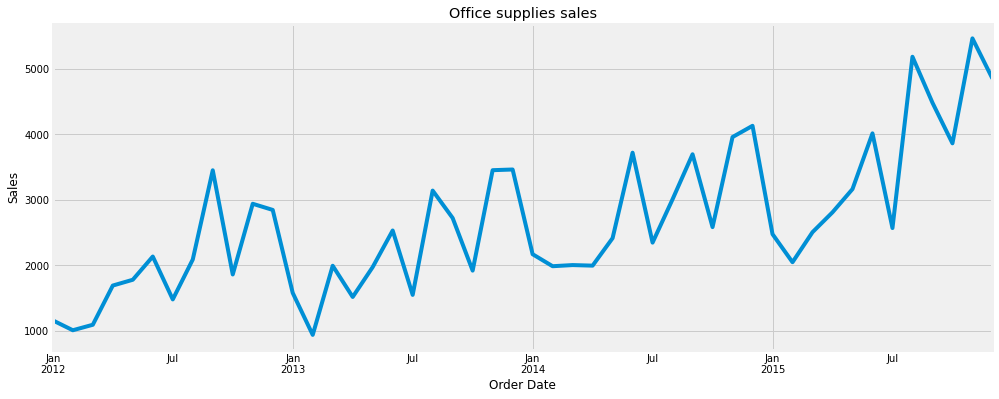

In [39]:
y_office.plot(figsize=(15,6))
plt.title("Office supplies sales")
plt.ylabel("Sales")
plt.show()

Text(0, 0.5, 'Sales')

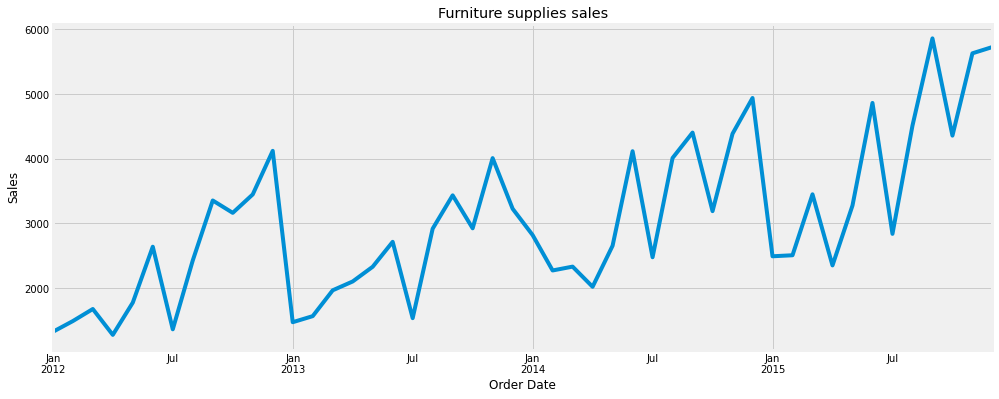

In [40]:
y_furniture.plot(figsize=(15,6))
plt.title("Furniture supplies sales")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

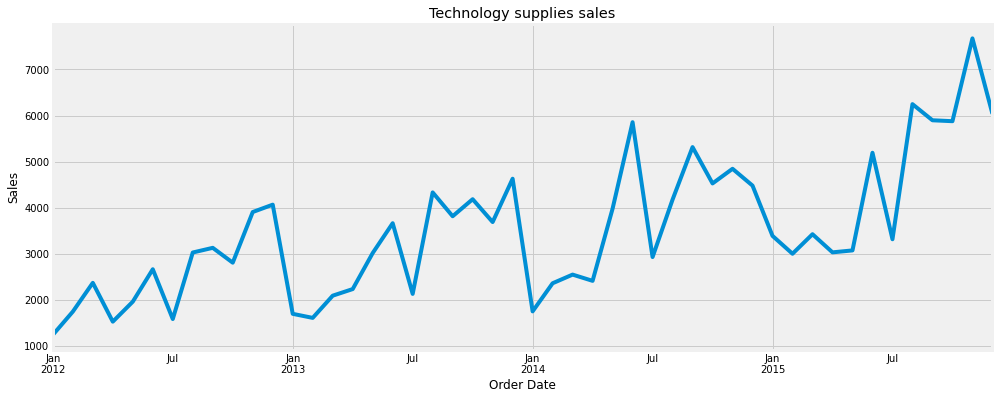

In [41]:
y_technology.plot(figsize=(15,6))
plt.title("Technology supplies sales")
plt.ylabel("Sales")

*Boxplots on sales of each product categories*

Text(0.5, 1.0, 'Box Plot on furniture sales')

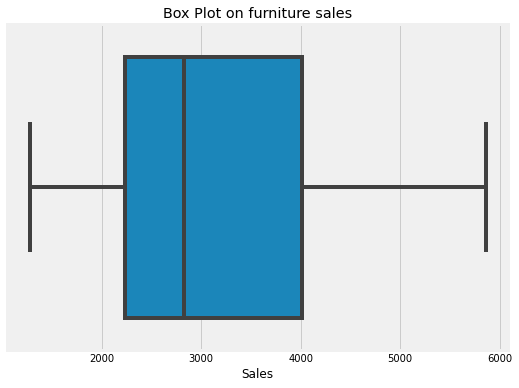

In [42]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(y_furniture).set_title('Box Plot on furniture sales')

Text(0.5, 1.0, 'Box Plot office supply sales')

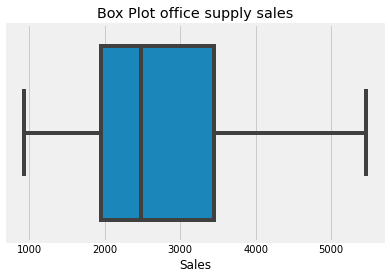

In [43]:
sns.boxplot(y_office).set_title('Box Plot office supply sales')

Text(0.5, 1.0, 'Box Plot Technology sales')

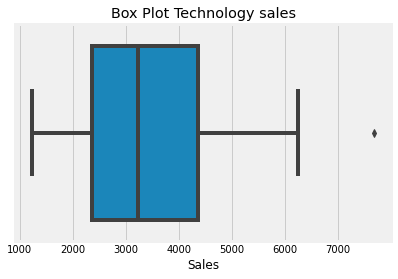

In [44]:
sns.boxplot(y_technology).set_title('Box Plot Technology sales')

# **Perform ets decomposition

ETS decomposition of office

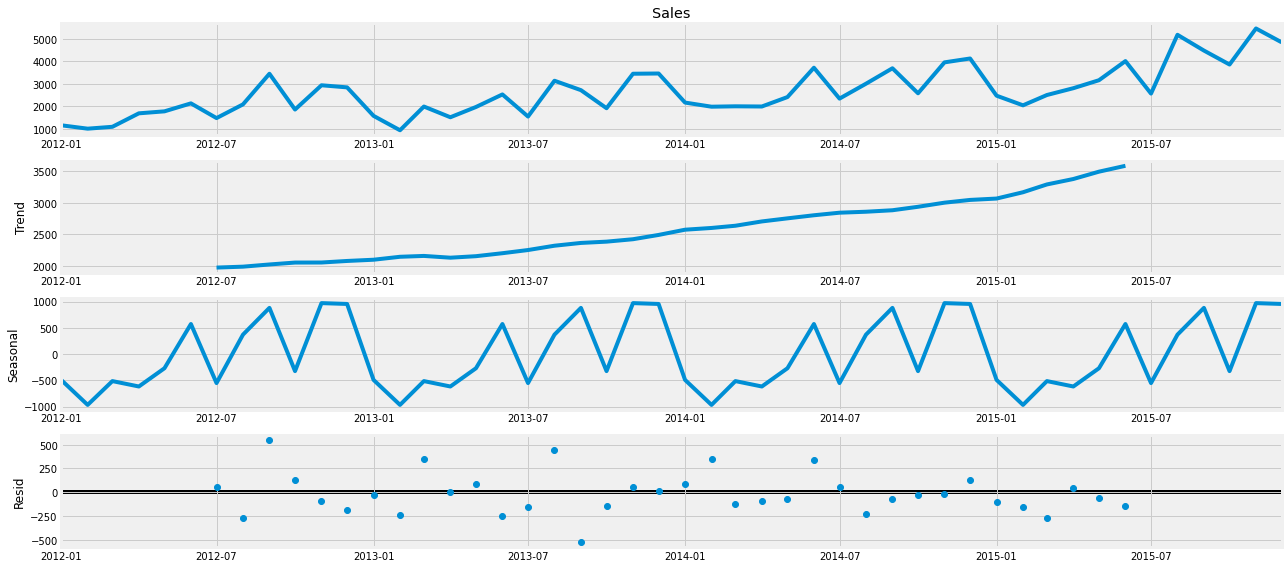

In [45]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition_office = sm.tsa.seasonal_decompose(y_office,model='additive')
fig = decomposition_office.plot()
plt.show()

<AxesSubplot: xlabel='Order Date'>

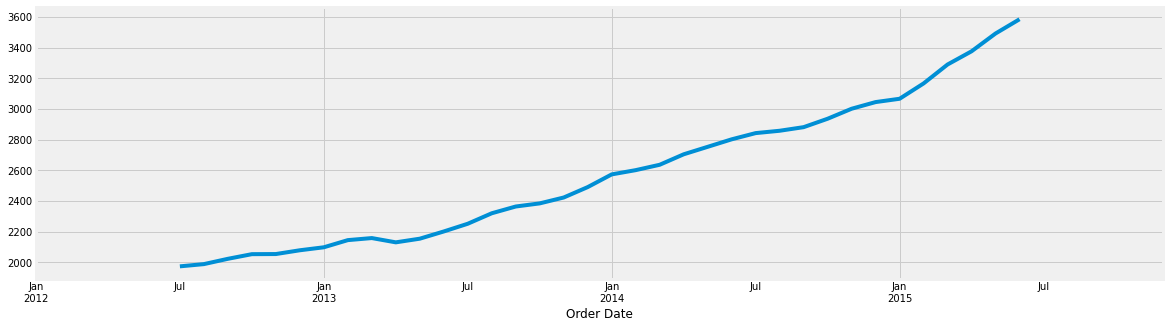

In [46]:
decomposition_office.trend.plot(figsize=(18,5))

<AxesSubplot: xlabel='Order Date'>

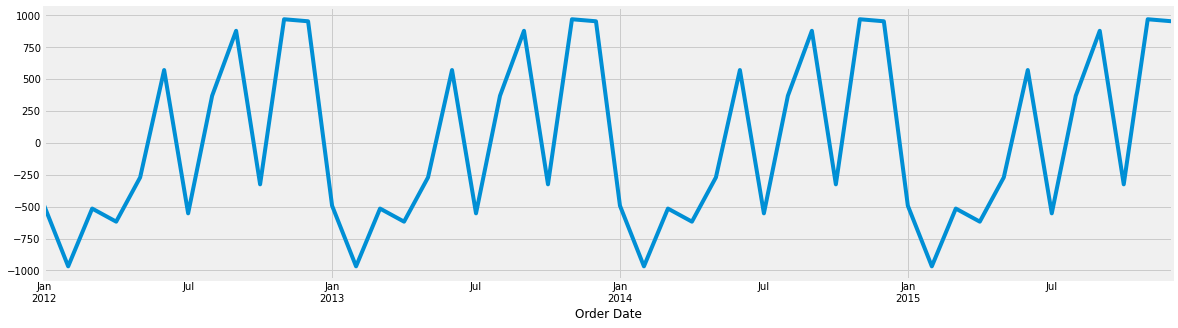

In [47]:
decomposition_office.seasonal.plot(figsize=(18,5))

ETS decomposition of furniture

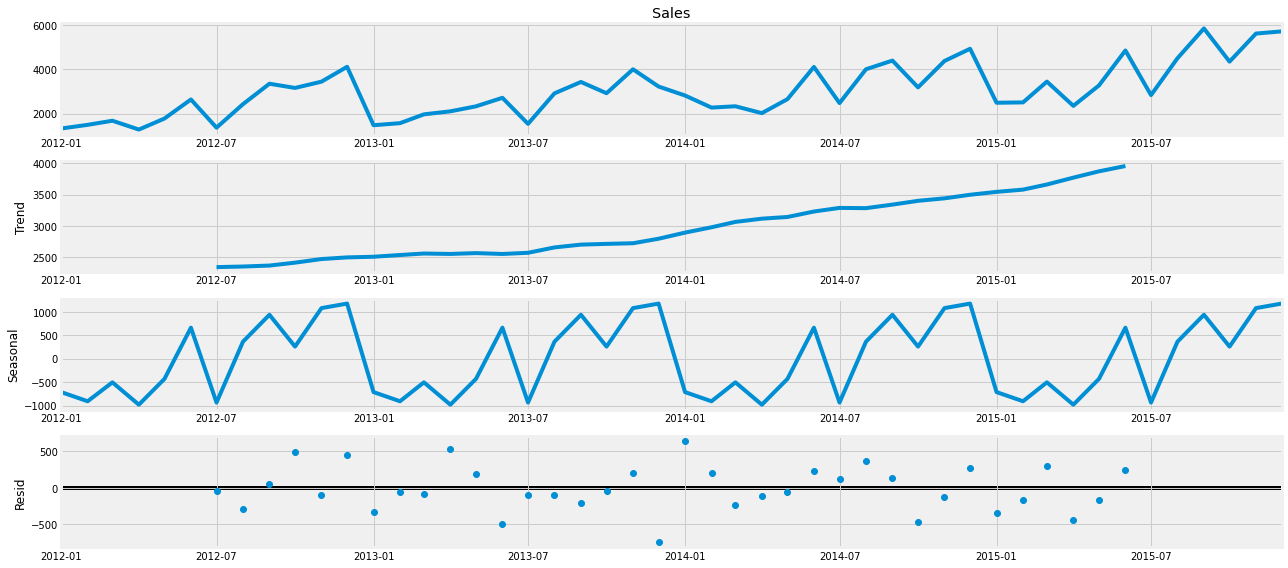

In [48]:
rcParams['figure.figsize']=18,8
decomposition_furniture = sm.tsa.seasonal_decompose(y_furniture,model='additive')
fig = decomposition_furniture.plot()
plt.show()

<AxesSubplot: xlabel='Order Date'>

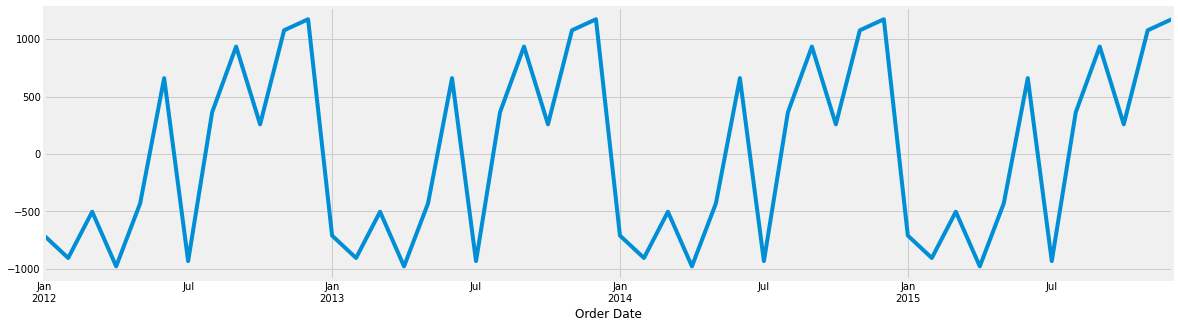

In [49]:
decomposition_furniture.seasonal.plot(figsize=(18,5))

<AxesSubplot: xlabel='Order Date'>

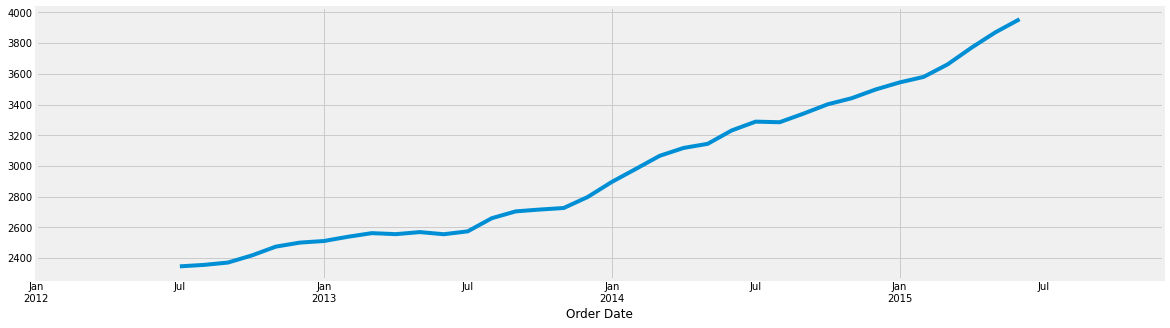

In [50]:
decomposition_furniture.trend.plot(figsize=(18,5))

ETS decomposition of technology

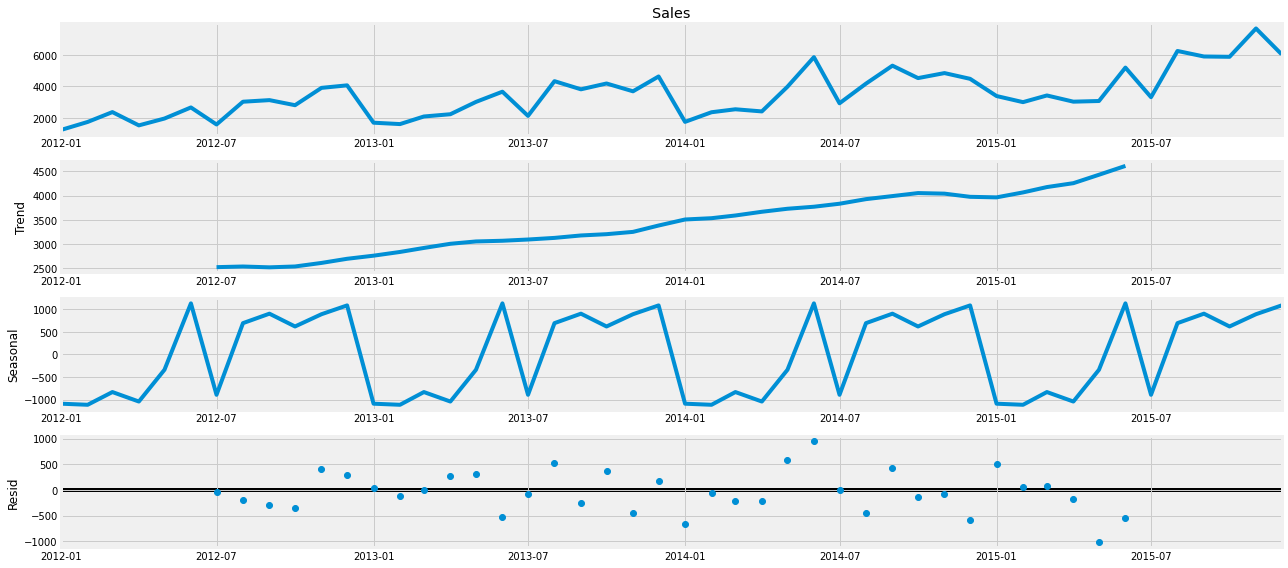

In [51]:
rcParams['figure.figsize']=18,8
decomposition_technology = sm.tsa.seasonal_decompose(y_technology,model='additive')
fig = decomposition_technology.plot()
plt.show()

<AxesSubplot: xlabel='Order Date'>

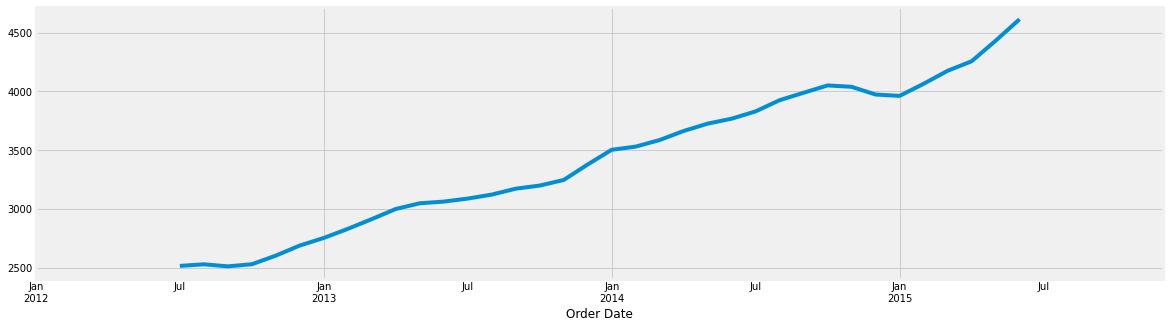

In [52]:
decomposition_technology.trend.plot(figsize=(18,5))

<AxesSubplot: xlabel='Order Date'>

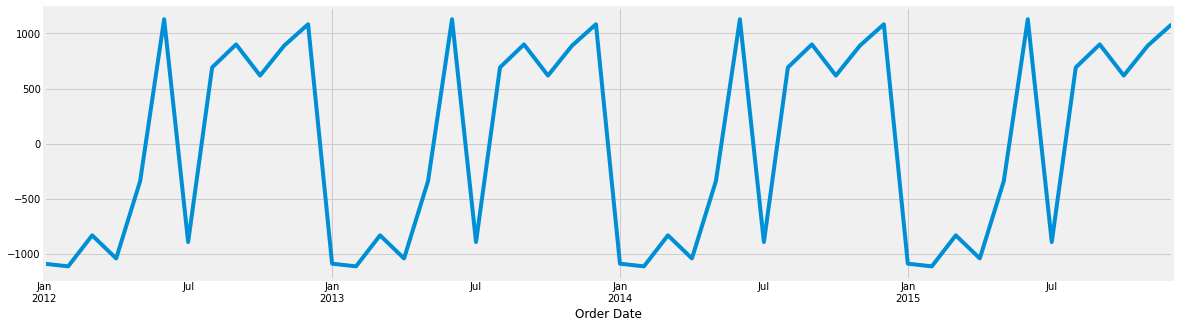

In [53]:
decomposition_technology.seasonal.plot(figsize=(18,5))

# **Test for stationarity**

In [54]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

Furniture

In [55]:
adf_test(y_furniture)

Augmented Dickey-Fuller Test: 
ADF test statistic       0.752340
p-value                  0.990827
# lags used             10.000000
# observations          37.000000
critical value (1%)     -3.620918
critical value (5%)     -2.943539
critical value (10%)    -2.610400
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Office

In [56]:
adf_test(y_office)

Augmented Dickey-Fuller Test: 
ADF test statistic       1.092981
p-value                  0.995156
# lags used             10.000000
# observations          37.000000
critical value (1%)     -3.620918
critical value (5%)     -2.943539
critical value (10%)    -2.610400
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Technology

In [57]:
adf_test(y_technology)

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.151210
p-value                  0.944093
# lags used              9.000000
# observations          38.000000
critical value (1%)     -3.615509
critical value (5%)     -2.941262
critical value (10%)    -2.609200
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


# **Time series forecasting with ARIMA**

# Train test split

Office

In [58]:
len(y_office)

48

In [59]:
#

In [60]:
train_office = y_office.iloc[:39]
test_office = y_office.iloc[39:]

In [61]:
train_office

Order Date
2012-01-01    1156.094052
2012-02-01    1005.193435
2012-03-01    1088.915883
2012-04-01    1687.506181
2012-05-01    1776.123986
2012-06-01    2130.785531
2012-07-01    1476.087897
2012-08-01    2085.349343
2012-09-01    3447.822490
2012-10-01    1856.679207
2012-11-01    2936.000277
2012-12-01    2842.200503
2013-01-01    1575.472470
2013-02-01     934.513627
2013-03-01    1989.677078
2013-04-01    1513.312397
2013-05-01    1969.785074
2013-06-01    2528.194203
2013-07-01    1544.880363
2013-08-01    3137.412019
2013-09-01    2718.764466
2013-10-01    1915.584871
2013-11-01    3448.951462
2013-12-01    3459.491813
2014-01-01    2166.122107
2014-02-01    1982.803000
2014-03-01    2000.253984
2014-04-01    1991.632446
2014-05-01    2411.485926
2014-06-01    3716.287013
2014-07-01    2343.035517
2014-08-01    3004.831258
2014-09-01    3692.055783
2014-10-01    2579.760713
2014-11-01    3954.849204
2014-12-01    4126.651919
2015-01-01    2472.706929
2015-02-01    2043.852667
2

In [62]:
test_office

Order Date
2015-04-01    2805.925310
2015-05-01    3160.480290
2015-06-01    4011.332620
2015-07-01    2565.712757
2015-08-01    5181.025640
2015-09-01    4479.550933
2015-10-01    3859.030963
2015-11-01    5461.710717
2015-12-01    4847.696439
Freq: MS, Name: Sales, dtype: float64

Find the best Model

In [63]:
!pip install pmdarima

In [64]:
from pmdarima import auto_arima

In [65]:
model_office = auto_arima(y_office,m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=540.141, Time=0.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=564.229, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=538.672, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=538.210, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=544.302, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=535.830, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=533.832, Time=0.06 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=535.830, Time=0.18 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=546.267, Time=0.04 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=535.644, Time=0.11 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=535.628, Time=0.11 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=536.673, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=532.714, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   

In [66]:
model_office.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -262.357
Date:                             Tue, 06 Dec 2022   AIC                            532.714
Time:                                     19:45:27   BIC                            538.935
Sample:                                 01-01-2012   HQIC                           534.862
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.7436     11.658      2.980      0.003      11.895      57.592
ma.L1         -0.9849      0.714     -1.379      0.168      -2.384       0.414
ar.S.L12      -0.6647      0.138     -4.808      0.000      -0.936      -0.394
sigma2      1.326e+05   1.04e+05      1.280      0.201   -7.05e+04    3.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.93   Prob(JB):                         0.49
Heteroskedasticity (H):               0.93   Skew:                             0.45
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
model_office

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

Train the model

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [69]:
model_office = SARIMAX(train_office,order=(0, 1, 1),seasonal_order=(2, 0, 0, 12),enforce_invertibility=False)

In [70]:
result_office = model_office.fit()

In [71]:
result_office.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   39
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood                -291.064
Date:                             Tue, 06 Dec 2022   AIC                            590.127
Time:                                     19:45:27   BIC                            596.677
Sample:                                 01-01-2012   HQIC                           592.458
                                      - 03-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8599      0.057    -15.212      0.000      -0.971      -0.749
ar.S.L12       0.3060      0.165      1.851      0.064      -0.018       0.630
ar.S.L24       0.6263      0.194      3.233      0.001       0.247       1.006
sigma2      1.191e+05    4.1e+04      2.904      0.004    3.87e+04    1.99e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.93   Prob(JB):                         0.76
Heteroskedasticity (H):               0.61   Skew:                             0.21
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Run model diagnostics to investigate any unusual behaviour

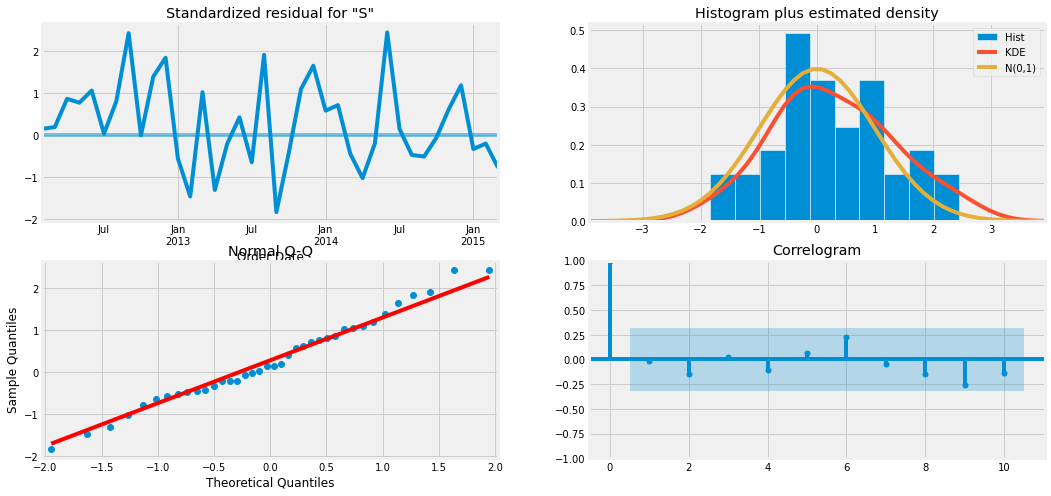

In [72]:
result_office.plot_diagnostics(figsize=(16,8))
plt.show()

Now predict values in the future

In [73]:
start = len(train_office)
end = len(train_office) + len(test_office) - 1

In [74]:
prediction_office = result_office.predict(start,end).rename('SARIMA model predictions')

In [75]:
prediction_office

2015-04-01    2431.156901
2015-05-01    2845.495729
2015-06-01    3594.437069
2015-07-01    2558.443850
2015-08-01    3758.297156
2015-09-01    3706.373178
2015-10-01    2863.037321
2015-11-01    4244.078607
2015-12-01    4303.245212
Freq: MS, Name: SARIMA model predictions, dtype: float64

Text(0.5, 1.0, 'Office supplies sales')

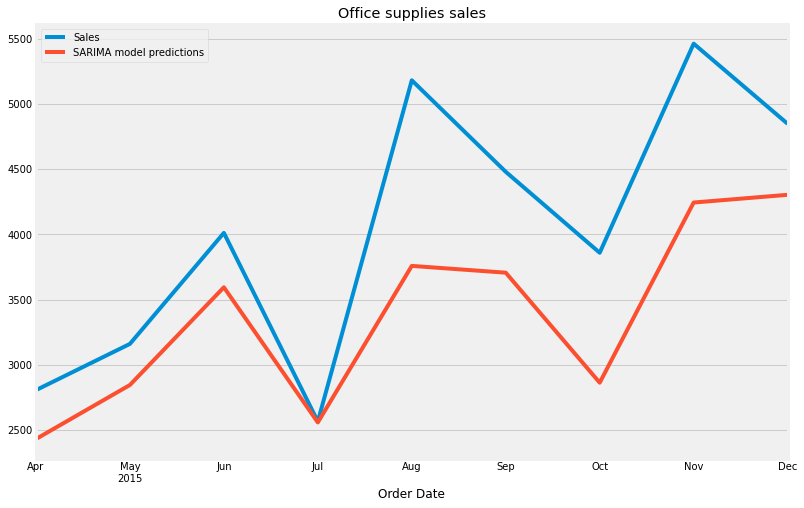

In [76]:
test_office.plot(figsize=(12,8),legend=True)
prediction_office.plot(legend=True)
plt.title("Office supplies sales")

Evaluation of our model

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [78]:
mean_squared_error(test_office,prediction_office)

645171.1087654806

In [79]:
rmse(test_office,prediction_office)

803.225440810661

In [80]:
test_office.mean()

4041.3850743752314

In [81]:
#Comparing the mean value to the root mean square value we can say that the model had predicted in a good way

*Now let us forecast into the unknown future*

In [82]:
model_office_final = SARIMAX(y_office,order=(0, 1, 1),seasonal_order=(2, 0, 0, 12),enforce_invertibility=False)

In [83]:
result_office_final = model_office_final.fit()

In [84]:
forecast_office = result_office_final.predict(len(y_office),len(y_office)+11,typ='levels').rename('SARIMA forecast')

Text(0.5, 1.0, 'Office supplies sales')

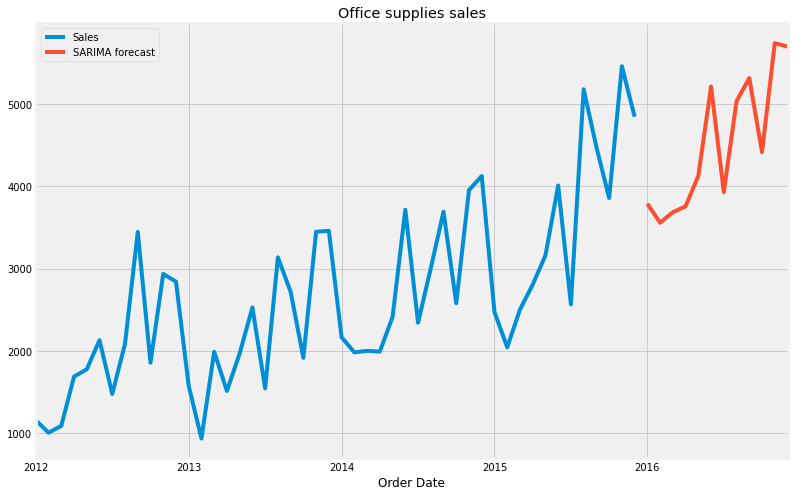

In [85]:
y_office.plot(legend=True,figsize=(12,8))
forecast_office.plot(legend=True)
plt.title("Office supplies sales")

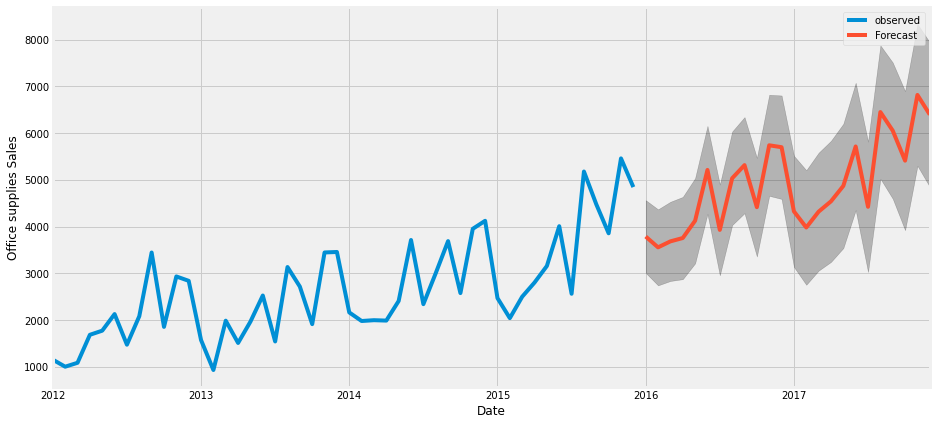

In [86]:
pred_office = result_office_final.get_forecast(steps=24)
pred_ci_office = pred_office.conf_int()
ax = y_office.plot(label='observed',figsize=(14,7))
pred_office.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci_office.index,
               pred_ci_office.iloc[:,0],
               pred_ci_office.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office supplies Sales')
plt.legend()
plt.show()

**Furniture**

In [87]:
len(y_furniture)

48

In [88]:
train_furniture = y_furniture.iloc[:36]
test_furniture = y_furniture.iloc[36:]

In [89]:
train_furniture

Order Date
2012-01-01    1325.528962
2012-02-01    1491.641146
2012-03-01    1678.219783
2012-04-01    1278.731046
2012-05-01    1777.452571
2012-06-01    2640.850083
2012-07-01    1364.476639
2012-08-01    2428.585846
2012-09-01    3354.774418
2012-10-01    3163.771044
2012-11-01    3448.512932
2012-12-01    4121.766997
2013-01-01    1474.527441
2013-02-01    1568.141392
2013-03-01    1967.226096
2013-04-01    2103.918158
2013-05-01    2331.075115
2013-06-01    2716.024737
2013-07-01    1536.718185
2013-08-01    2918.773897
2013-09-01    3434.485043
2013-10-01    2924.962890
2013-11-01    4009.302983
2013-12-01    3227.224647
2014-01-01    2820.848300
2014-02-01    2273.767088
2014-03-01    2332.974743
2014-04-01    2021.740085
2014-05-01    2656.101750
2014-06-01    4116.090768
2014-07-01    2477.720659
2014-08-01    4010.569750
2014-09-01    4403.471910
2014-10-01    3189.948518
2014-11-01    4385.811496
2014-12-01    4938.036307
Freq: MS, Name: Sales, dtype: float64

In [90]:
test_furniture

Order Date
2015-01-01    2492.838239
2015-02-01    2508.818696
2015-03-01    3450.206981
2015-04-01    2351.695310
2015-05-01    3277.070130
2015-06-01    4861.539718
2015-07-01    2839.458793
2015-08-01    4510.137246
2015-09-01    5859.221423
2015-10-01    4356.705863
2015-11-01    5628.288940
2015-12-01    5725.612620
Freq: MS, Name: Sales, dtype: float64

In [91]:
len(test_furniture)

12

Find the best model

In [92]:
model_furniture = auto_arima(y_furniture,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=544.017, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=566.543, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=546.460, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=539.858, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=548.098, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=540.125, Time=0.10 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=538.295, Time=0.06 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=539.882, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=551.427, Time=0.04 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=540.254, Time=0.11 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=540.219, Time=0.12 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=in

In [93]:
model_furniture.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -266.148
Date:                             Tue, 06 Dec 2022   AIC                            538.295
Time:                                     19:45:30   BIC                            542.961
Sample:                                 01-01-2012   HQIC                           539.906
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7377      0.182     -4.044      0.000      -1.095      -0.380
ar.S.L12      -0.5730      0.112     -5.133      0.000      -0.792      -0.354
sigma2      2.162e+05   5.28e+04      4.094      0.000    1.13e+05     3.2e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.42   Prob(JB):                         0.75
Heteroskedasticity (H):               1.23   Skew:                             0.25
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
model_furniture

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Train the model

In [95]:
model_furniture = SARIMAX(train_furniture,order=(2, 0, 2),seasonal_order=(1, 1, 1, 12),enforce_invertibility=False)

In [96]:
result_furniture = model_furniture.fit()

C:\Users\azizo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Run model diagnostics to investigate any unusual behaviour

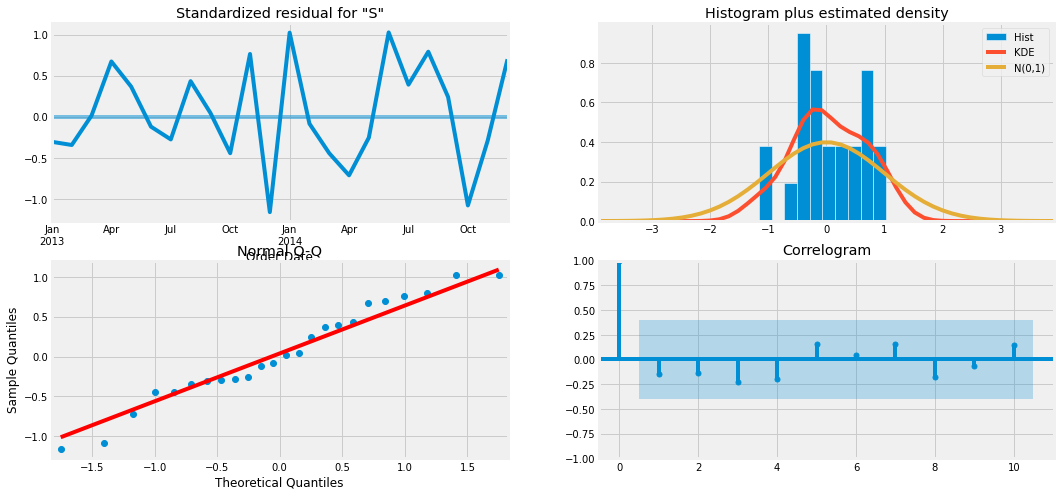

In [97]:
result_furniture.plot_diagnostics(figsize=(16,8))
plt.show()

Now predict the values in the future

In [98]:
start = len(train_furniture)
end = len(train_furniture) + len(test_furniture) - 1

In [99]:
prediction_furniture = result_furniture.predict(start,end).rename('SARIMA model')

In [100]:
prediction_furniture

2015-01-01    2952.700616
2015-02-01    2682.981249
2015-03-01    2906.184230
2015-04-01    2837.139651
2015-05-01    3267.475190
2015-06-01    4214.766491
2015-07-01    2789.521996
2015-08-01    4278.162921
2015-09-01    4688.006447
2015-10-01    3761.764464
2015-11-01    4968.442754
2015-12-01    4818.088526
Freq: MS, Name: SARIMA model, dtype: float64

Text(0.5, 1.0, 'Furniture item sales')

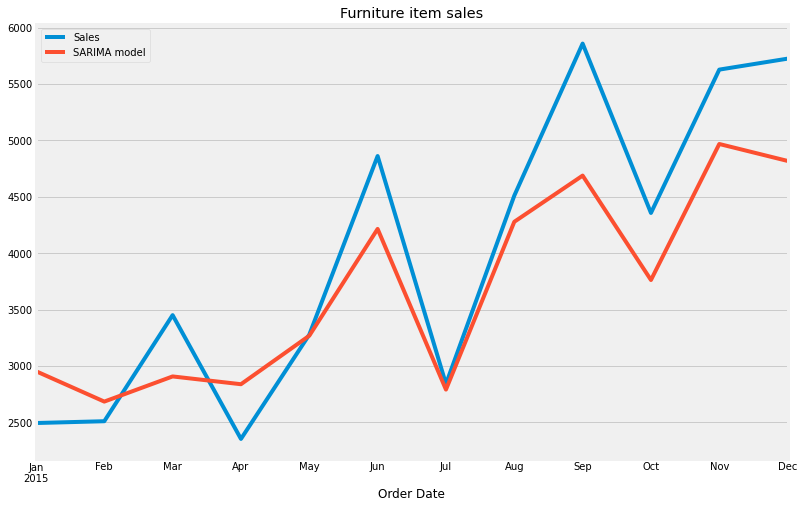

In [101]:
test_furniture.plot(figsize=(12,8),legend=True)
prediction_furniture.plot(legend=True)
plt.title("Furniture item sales")

Evaluation of our model

In [102]:
rmse(test_furniture,prediction_furniture)

593.915900488329

In [103]:
test_furniture.mean()

3988.466163313579

Now let us forecast into the Unknown Future

In [104]:
model_furniture_final = SARIMAX(y_furniture,order=(2, 0, 2),seasonal_order=(1, 1, 1, 12),enforce_invertibility=False)

In [105]:
result_furniture_final = model_furniture_final.fit()

C:\Users\azizo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [106]:
forecast_furniture = result_furniture_final.predict(len(y_furniture),len(y_furniture)+11,typ='levels').rename('SARIMA forecast')

<AxesSubplot: xlabel='Order Date'>

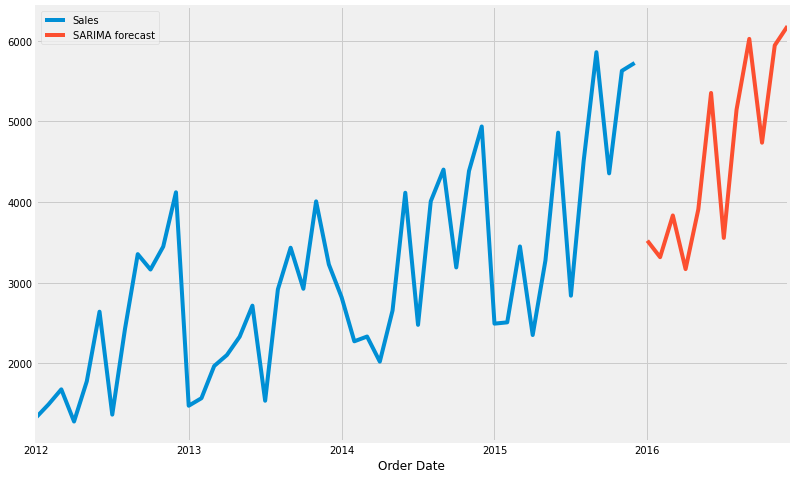

In [107]:
y_furniture.plot(legend=True,figsize=(12,8))
forecast_furniture.plot(legend=True)

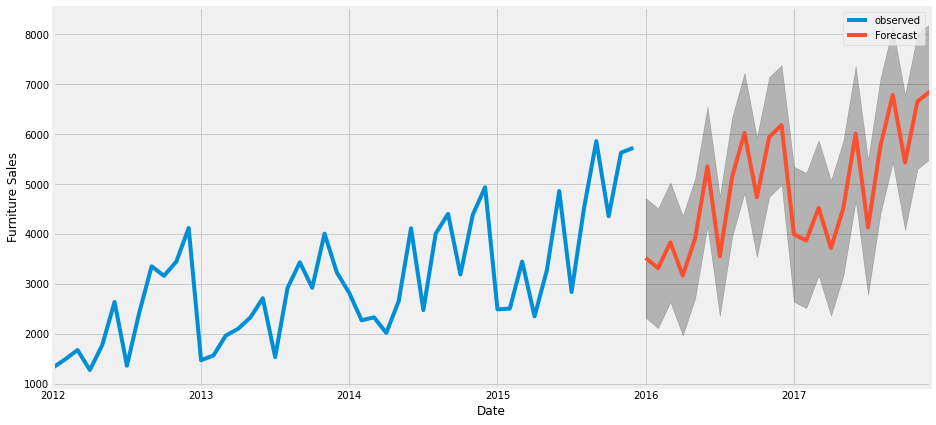

In [108]:
pred_furniture = result_furniture_final.get_forecast(steps=24)
pred_ci_furniture = pred_furniture.conf_int()
ax = y_furniture.plot(label='observed',figsize=(14,7))
pred_furniture.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci_furniture.index,
               pred_ci_furniture.iloc[:,0],
               pred_ci_furniture.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

**Technology**

In [109]:
len(y_technology)

48

In [110]:
train_technology = y_technology.iloc[:36]
test_technology = y_technology.iloc[36:]

In [111]:
train_technology

Order Date
2012-01-01    1236.320332
2012-02-01    1740.979438
2012-03-01    2366.317281
2012-04-01    1523.230048
2012-05-01    1957.606173
2012-06-01    2661.311946
2012-07-01    1580.191893
2012-08-01    3024.929570
2012-09-01    3126.455607
2012-10-01    2804.135010
2012-11-01    3903.892204
2012-12-01    4063.874203
2013-01-01    1693.232329
2013-02-01    1605.313665
2013-03-01    2087.429208
2013-04-01    2230.869211
2013-05-01    3012.947357
2013-06-01    3661.078900
2013-07-01    2125.888270
2013-08-01    4329.954532
2013-09-01    3812.647170
2013-10-01    4182.030592
2013-11-01    3686.204821
2013-12-01    4627.447621
2014-01-01    1746.588117
2014-02-01    2357.034504
2014-03-01    2545.102286
2014-04-01    2409.593786
2014-05-01    3977.558996
2014-06-01    5854.498624
2014-07-01    2926.132910
2014-08-01    4173.898876
2014-09-01    5313.726415
2014-10-01    4524.830825
2014-11-01    4843.133117
2014-12-01    4477.503860
Freq: MS, Name: Sales, dtype: float64

In [112]:
test_technology

Order Date
2015-01-01    3386.256075
2015-02-01    2997.937650
2015-03-01    3422.111536
2015-04-01    3028.305600
2015-05-01    3070.468440
2015-06-01    5191.106161
2015-07-01    3312.999753
2015-08-01    6246.618939
2015-09-01    5896.347348
2015-10-01    5876.484153
2015-11-01    7675.139214
2015-12-01    6036.557510
Freq: MS, Name: Sales, dtype: float64

In [113]:
len(test_technology)

12

Find the best model

In [114]:
model_technology = auto_arima(y_technology,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=807.511, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=783.720, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=785.070, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=805.825, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=798.836, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=785.367, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=784.078, Time=0.18 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=787.514, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=791.565, Time=0.05 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=783.318, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=797.413, Time=0.02 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=784.984, Time=0.27 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AI

In [115]:
model_technology.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -384.726
Date:                            Tue, 06 Dec 2022   AIC                            779.452
Time:                                    19:45:39   BIC                            788.703
Sample:                                01-01-2012   HQIC                           782.933
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2574      0.243      1.061      0.289      -0.218       0.733
ma.L1         -0.8577      0.084    -10.260      0.000      -1.022      -0.694
ar.S.L12       0.9905      0.033     29.616      0.000       0.925       1.056
ma.S.L12      -0.8090      0.362     -2.235      0.025      -1.519      -0.099
sigma2      4.579e+05   9.26e-07   4.94e+11      0.000    4.58e+05    4.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.69   Prob(JB):                         0.53
Heteroskedasticity (H):               1.43   Skew:                             0.39
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.04e+28. Standard errors may be unstable.
"""

In [116]:
model_technology

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [117]:
#That means our data have White noise .
#Time series that show no autocorrelation are called white noise.
#If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.
#https://machinelearningmastery.com/white-noise-time-series-python/
#https://machinelearningmastery.com/white-noise-time-series-python/#:~:text=White%20noise%20is%20an%20important,made%20to%20the%20predictive%20model.

# **Comparing product categories**

In [118]:
furniture1 = pd.DataFrame({'Order Date': y_furniture.index , 'Sales':y_furniture.values})
furniture1

Order Date        Sales
0  2012-01-01  1325.528962
1  2012-02-01  1491.641146
2  2012-03-01  1678.219783
3  2012-04-01  1278.731046
4  2012-05-01  1777.452571
5  2012-06-01  2640.850083
6  2012-07-01  1364.476639
7  2012-08-01  2428.585846
8  2012-09-01  3354.774418
9  2012-10-01  3163.771044
10 2012-11-01  3448.512932
11 2012-12-01  4121.766997
12 2013-01-01  1474.527441
13 2013-02-01  1568.141392
14 2013-03-01  1967.226096
15 2013-04-01  2103.918158
16 2013-05-01  2331.075115
17 2013-06-01  2716.024737
18 2013-07-01  1536.718185
19 2013-08-01  2918.773897
20 2013-09-01  3434.485043
21 2013-10-01  2924.962890
22 2013-11-01  4009.302983
23 2013-12-01  3227.224647
24 2014-01-01  2820.848300
25 2014-02-01  2273.767088
26 2014-03-01  2332.974743
27 2014-04-01  2021.740085
28 2014-05-01  2656.101750
29 2014-06-01  4116.090768
30 2014-07-01  2477.720659
31 2014-08-01  4010.569750
32 2014-09-01  4403.471910
33 2014-10-01  3189.948518
34 2014-11-01  4385.811496
35 2014-12-01  4938.036307
36 2015-01-01  2492.838239
37 2015-02-01  2508.818696
38 2015-03-01  3450.206981
39 2015-04-01  2351.695310
40 2015-05-01  3277.070130
41 2015-06-01  4861.539718
42 2015-07-01  2839.458793
43 2015-08-01  4510.137246
44 2015-09-01  5859.221423
45 2015-10-01  4356.705863
46 2015-11-01  5628.288940
47 2015-12-01  5725.612620

In [119]:
office1 = pd.DataFrame({'Order Date': y_office.index , 'Sales':y_office.values})
office1

Order Date        Sales
0  2012-01-01  1156.094052
1  2012-02-01  1005.193435
2  2012-03-01  1088.915883
3  2012-04-01  1687.506181
4  2012-05-01  1776.123986
5  2012-06-01  2130.785531
6  2012-07-01  1476.087897
7  2012-08-01  2085.349343
8  2012-09-01  3447.822490
9  2012-10-01  1856.679207
10 2012-11-01  2936.000277
11 2012-12-01  2842.200503
12 2013-01-01  1575.472470
13 2013-02-01   934.513627
14 2013-03-01  1989.677078
15 2013-04-01  1513.312397
16 2013-05-01  1969.785074
17 2013-06-01  2528.194203
18 2013-07-01  1544.880363
19 2013-08-01  3137.412019
20 2013-09-01  2718.764466
21 2013-10-01  1915.584871
22 2013-11-01  3448.951462
23 2013-12-01  3459.491813
24 2014-01-01  2166.122107
25 2014-02-01  1982.803000
26 2014-03-01  2000.253984
27 2014-04-01  1991.632446
28 2014-05-01  2411.485926
29 2014-06-01  3716.287013
30 2014-07-01  2343.035517
31 2014-08-01  3004.831258
32 2014-09-01  3692.055783
33 2014-10-01  2579.760713
34 2014-11-01  3954.849204
35 2014-12-01  4126.651919
36 2015-01-01  2472.706929
37 2015-02-01  2043.852667
38 2015-03-01  2502.460261
39 2015-04-01  2805.925310
40 2015-05-01  3160.480290
41 2015-06-01  4011.332620
42 2015-07-01  2565.712757
43 2015-08-01  5181.025640
44 2015-09-01  4479.550933
45 2015-10-01  3859.030963
46 2015-11-01  5461.710717
47 2015-12-01  4847.696439

In [120]:
technology1 = pd.DataFrame({'Order Date': y_technology.index , 'Sales':y_technology.values})
technology1

Order Date        Sales
0  2012-01-01  1236.320332
1  2012-02-01  1740.979438
2  2012-03-01  2366.317281
3  2012-04-01  1523.230048
4  2012-05-01  1957.606173
5  2012-06-01  2661.311946
6  2012-07-01  1580.191893
7  2012-08-01  3024.929570
8  2012-09-01  3126.455607
9  2012-10-01  2804.135010
10 2012-11-01  3903.892204
11 2012-12-01  4063.874203
12 2013-01-01  1693.232329
13 2013-02-01  1605.313665
14 2013-03-01  2087.429208
15 2013-04-01  2230.869211
16 2013-05-01  3012.947357
17 2013-06-01  3661.078900
18 2013-07-01  2125.888270
19 2013-08-01  4329.954532
20 2013-09-01  3812.647170
21 2013-10-01  4182.030592
22 2013-11-01  3686.204821
23 2013-12-01  4627.447621
24 2014-01-01  1746.588117
25 2014-02-01  2357.034504
26 2014-03-01  2545.102286
27 2014-04-01  2409.593786
28 2014-05-01  3977.558996
29 2014-06-01  5854.498624
30 2014-07-01  2926.132910
31 2014-08-01  4173.898876
32 2014-09-01  5313.726415
33 2014-10-01  4524.830825
34 2014-11-01  4843.133117
35 2014-12-01  4477.503860
36 2015-01-01  3386.256075
37 2015-02-01  2997.937650
38 2015-03-01  3422.111536
39 2015-04-01  3028.305600
40 2015-05-01  3070.468440
41 2015-06-01  5191.106161
42 2015-07-01  3312.999753
43 2015-08-01  6246.618939
44 2015-09-01  5896.347348
45 2015-10-01  5876.484153
46 2015-11-01  7675.139214
47 2015-12-01  6036.557510

**Data Exploration**

In [121]:
store_office_furniture = furniture1.merge(office1, how='inner', on='Order Date')
store_office_furniture

Order Date      Sales_x      Sales_y
0  2012-01-01  1325.528962  1156.094052
1  2012-02-01  1491.641146  1005.193435
2  2012-03-01  1678.219783  1088.915883
3  2012-04-01  1278.731046  1687.506181
4  2012-05-01  1777.452571  1776.123986
5  2012-06-01  2640.850083  2130.785531
6  2012-07-01  1364.476639  1476.087897
7  2012-08-01  2428.585846  2085.349343
8  2012-09-01  3354.774418  3447.822490
9  2012-10-01  3163.771044  1856.679207
10 2012-11-01  3448.512932  2936.000277
11 2012-12-01  4121.766997  2842.200503
12 2013-01-01  1474.527441  1575.472470
13 2013-02-01  1568.141392   934.513627
14 2013-03-01  1967.226096  1989.677078
15 2013-04-01  2103.918158  1513.312397
16 2013-05-01  2331.075115  1969.785074
17 2013-06-01  2716.024737  2528.194203
18 2013-07-01  1536.718185  1544.880363
19 2013-08-01  2918.773897  3137.412019
20 2013-09-01  3434.485043  2718.764466
21 2013-10-01  2924.962890  1915.584871
22 2013-11-01  4009.302983  3448.951462
23 2013-12-01  3227.224647  3459.491813
24 2014-01-01  2820.848300  2166.122107
25 2014-02-01  2273.767088  1982.803000
26 2014-03-01  2332.974743  2000.253984
27 2014-04-01  2021.740085  1991.632446
28 2014-05-01  2656.101750  2411.485926
29 2014-06-01  4116.090768  3716.287013
30 2014-07-01  2477.720659  2343.035517
31 2014-08-01  4010.569750  3004.831258
32 2014-09-01  4403.471910  3692.055783
33 2014-10-01  3189.948518  2579.760713
34 2014-11-01  4385.811496  3954.849204
35 2014-12-01  4938.036307  4126.651919
36 2015-01-01  2492.838239  2472.706929
37 2015-02-01  2508.818696  2043.852667
38 2015-03-01  3450.206981  2502.460261
39 2015-04-01  2351.695310  2805.925310
40 2015-05-01  3277.070130  3160.480290
41 2015-06-01  4861.539718  4011.332620
42 2015-07-01  2839.458793  2565.712757
43 2015-08-01  4510.137246  5181.025640
44 2015-09-01  5859.221423  4479.550933
45 2015-10-01  4356.705863  3859.030963
46 2015-11-01  5628.288940  5461.710717
47 2015-12-01  5725.612620  4847.696439

In [122]:
store_office_furniture.rename(columns={'Sales_x':'furniture_sales','Sales_y':'office_sales'},inplace=True)
store_office_furniture

Order Date  furniture_sales  office_sales
0  2012-01-01      1325.528962   1156.094052
1  2012-02-01      1491.641146   1005.193435
2  2012-03-01      1678.219783   1088.915883
3  2012-04-01      1278.731046   1687.506181
4  2012-05-01      1777.452571   1776.123986
5  2012-06-01      2640.850083   2130.785531
6  2012-07-01      1364.476639   1476.087897
7  2012-08-01      2428.585846   2085.349343
8  2012-09-01      3354.774418   3447.822490
9  2012-10-01      3163.771044   1856.679207
10 2012-11-01      3448.512932   2936.000277
11 2012-12-01      4121.766997   2842.200503
12 2013-01-01      1474.527441   1575.472470
13 2013-02-01      1568.141392    934.513627
14 2013-03-01      1967.226096   1989.677078
15 2013-04-01      2103.918158   1513.312397
16 2013-05-01      2331.075115   1969.785074
17 2013-06-01      2716.024737   2528.194203
18 2013-07-01      1536.718185   1544.880363
19 2013-08-01      2918.773897   3137.412019
20 2013-09-01      3434.485043   2718.764466
21 2013-10-01      2924.962890   1915.584871
22 2013-11-01      4009.302983   3448.951462
23 2013-12-01      3227.224647   3459.491813
24 2014-01-01      2820.848300   2166.122107
25 2014-02-01      2273.767088   1982.803000
26 2014-03-01      2332.974743   2000.253984
27 2014-04-01      2021.740085   1991.632446
28 2014-05-01      2656.101750   2411.485926
29 2014-06-01      4116.090768   3716.287013
30 2014-07-01      2477.720659   2343.035517
31 2014-08-01      4010.569750   3004.831258
32 2014-09-01      4403.471910   3692.055783
33 2014-10-01      3189.948518   2579.760713
34 2014-11-01      4385.811496   3954.849204
35 2014-12-01      4938.036307   4126.651919
36 2015-01-01      2492.838239   2472.706929
37 2015-02-01      2508.818696   2043.852667
38 2015-03-01      3450.206981   2502.460261
39 2015-04-01      2351.695310   2805.925310
40 2015-05-01      3277.070130   3160.480290
41 2015-06-01      4861.539718   4011.332620
42 2015-07-01      2839.458793   2565.712757
43 2015-08-01      4510.137246   5181.025640
44 2015-09-01      5859.221423   4479.550933
45 2015-10-01      4356.705863   3859.030963
46 2015-11-01      5628.288940   5461.710717
47 2015-12-01      5725.612620   4847.696439

In [123]:
store_office_furniture_technology = technology1.merge(store_office_furniture, how='inner', on='Order Date')
store_office_furniture_technology

Order Date        Sales  furniture_sales  office_sales
0  2012-01-01  1236.320332      1325.528962   1156.094052
1  2012-02-01  1740.979438      1491.641146   1005.193435
2  2012-03-01  2366.317281      1678.219783   1088.915883
3  2012-04-01  1523.230048      1278.731046   1687.506181
4  2012-05-01  1957.606173      1777.452571   1776.123986
5  2012-06-01  2661.311946      2640.850083   2130.785531
6  2012-07-01  1580.191893      1364.476639   1476.087897
7  2012-08-01  3024.929570      2428.585846   2085.349343
8  2012-09-01  3126.455607      3354.774418   3447.822490
9  2012-10-01  2804.135010      3163.771044   1856.679207
10 2012-11-01  3903.892204      3448.512932   2936.000277
11 2012-12-01  4063.874203      4121.766997   2842.200503
12 2013-01-01  1693.232329      1474.527441   1575.472470
13 2013-02-01  1605.313665      1568.141392    934.513627
14 2013-03-01  2087.429208      1967.226096   1989.677078
15 2013-04-01  2230.869211      2103.918158   1513.312397
16 2013-05-01  3012.947357      2331.075115   1969.785074
17 2013-06-01  3661.078900      2716.024737   2528.194203
18 2013-07-01  2125.888270      1536.718185   1544.880363
19 2013-08-01  4329.954532      2918.773897   3137.412019
20 2013-09-01  3812.647170      3434.485043   2718.764466
21 2013-10-01  4182.030592      2924.962890   1915.584871
22 2013-11-01  3686.204821      4009.302983   3448.951462
23 2013-12-01  4627.447621      3227.224647   3459.491813
24 2014-01-01  1746.588117      2820.848300   2166.122107
25 2014-02-01  2357.034504      2273.767088   1982.803000
26 2014-03-01  2545.102286      2332.974743   2000.253984
27 2014-04-01  2409.593786      2021.740085   1991.632446
28 2014-05-01  3977.558996      2656.101750   2411.485926
29 2014-06-01  5854.498624      4116.090768   3716.287013
30 2014-07-01  2926.132910      2477.720659   2343.035517
31 2014-08-01  4173.898876      4010.569750   3004.831258
32 2014-09-01  5313.726415      4403.471910   3692.055783
33 2014-10-01  4524.830825      3189.948518   2579.760713
34 2014-11-01  4843.133117      4385.811496   3954.849204
35 2014-12-01  4477.503860      4938.036307   4126.651919
36 2015-01-01  3386.256075      2492.838239   2472.706929
37 2015-02-01  2997.937650      2508.818696   2043.852667
38 2015-03-01  3422.111536      3450.206981   2502.460261
39 2015-04-01  3028.305600      2351.695310   2805.925310
40 2015-05-01  3070.468440      3277.070130   3160.480290
41 2015-06-01  5191.106161      4861.539718   4011.332620
42 2015-07-01  3312.999753      2839.458793   2565.712757
43 2015-08-01  6246.618939      4510.137246   5181.025640
44 2015-09-01  5896.347348      5859.221423   4479.550933
45 2015-10-01  5876.484153      4356.705863   3859.030963
46 2015-11-01  7675.139214      5628.288940   5461.710717
47 2015-12-01  6036.557510      5725.612620   4847.696439

In [124]:
store_office_furniture_technology.rename(columns={'Sales':'technology_sales','Sales_x':'furniture_sales','Sales_y':'office_sales'},inplace=True)
store_office_furniture_technology

Order Date  technology_sales  furniture_sales  office_sales
0  2012-01-01       1236.320332      1325.528962   1156.094052
1  2012-02-01       1740.979438      1491.641146   1005.193435
2  2012-03-01       2366.317281      1678.219783   1088.915883
3  2012-04-01       1523.230048      1278.731046   1687.506181
4  2012-05-01       1957.606173      1777.452571   1776.123986
5  2012-06-01       2661.311946      2640.850083   2130.785531
6  2012-07-01       1580.191893      1364.476639   1476.087897
7  2012-08-01       3024.929570      2428.585846   2085.349343
8  2012-09-01       3126.455607      3354.774418   3447.822490
9  2012-10-01       2804.135010      3163.771044   1856.679207
10 2012-11-01       3903.892204      3448.512932   2936.000277
11 2012-12-01       4063.874203      4121.766997   2842.200503
12 2013-01-01       1693.232329      1474.527441   1575.472470
13 2013-02-01       1605.313665      1568.141392    934.513627
14 2013-03-01       2087.429208      1967.226096   1989.677078
15 2013-04-01       2230.869211      2103.918158   1513.312397
16 2013-05-01       3012.947357      2331.075115   1969.785074
17 2013-06-01       3661.078900      2716.024737   2528.194203
18 2013-07-01       2125.888270      1536.718185   1544.880363
19 2013-08-01       4329.954532      2918.773897   3137.412019
20 2013-09-01       3812.647170      3434.485043   2718.764466
21 2013-10-01       4182.030592      2924.962890   1915.584871
22 2013-11-01       3686.204821      4009.302983   3448.951462
23 2013-12-01       4627.447621      3227.224647   3459.491813
24 2014-01-01       1746.588117      2820.848300   2166.122107
25 2014-02-01       2357.034504      2273.767088   1982.803000
26 2014-03-01       2545.102286      2332.974743   2000.253984
27 2014-04-01       2409.593786      2021.740085   1991.632446
28 2014-05-01       3977.558996      2656.101750   2411.485926
29 2014-06-01       5854.498624      4116.090768   3716.287013
30 2014-07-01       2926.132910      2477.720659   2343.035517
31 2014-08-01       4173.898876      4010.569750   3004.831258
32 2014-09-01       5313.726415      4403.471910   3692.055783
33 2014-10-01       4524.830825      3189.948518   2579.760713
34 2014-11-01       4843.133117      4385.811496   3954.849204
35 2014-12-01       4477.503860      4938.036307   4126.651919
36 2015-01-01       3386.256075      2492.838239   2472.706929
37 2015-02-01       2997.937650      2508.818696   2043.852667
38 2015-03-01       3422.111536      3450.206981   2502.460261
39 2015-04-01       3028.305600      2351.695310   2805.925310
40 2015-05-01       3070.468440      3277.070130   3160.480290
41 2015-06-01       5191.106161      4861.539718   4011.332620
42 2015-07-01       3312.999753      2839.458793   2565.712757
43 2015-08-01       6246.618939      4510.137246   5181.025640
44 2015-09-01       5896.347348      5859.221423   4479.550933
45 2015-10-01       5876.484153      4356.705863   3859.030963
46 2015-11-01       7675.139214      5628.288940   5461.710717
47 2015-12-01       6036.557510      5725.612620   4847.696439

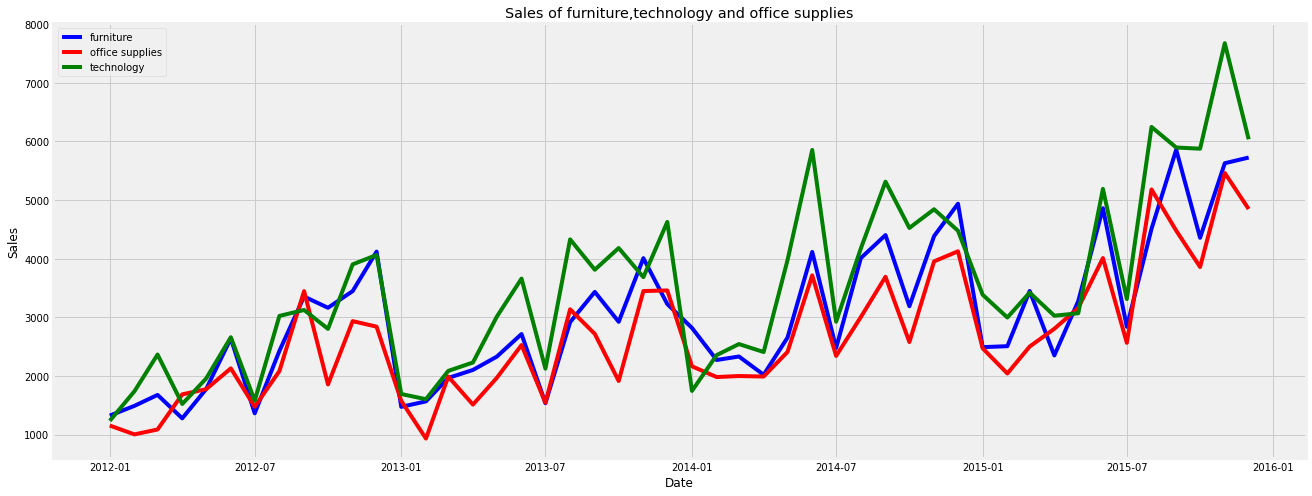

In [125]:
plt.figure(figsize=(20,8))
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['furniture_sales'],'b-',label='furniture')
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['office_sales'],'r-',label='office supplies')
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['technology_sales'],'g-',label='technology')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture,technology and office supplies')
plt.legend()

# **Time series modelling with prophet**

In [126]:
from prophet import Prophet
import matplotlib.pyplot as plt

**Furniture**

In [127]:
y_furniture_df = y_furniture.to_frame()

In [128]:
y_furniture_df['ds'] = y_furniture_df.index

In [129]:
y_furniture_df.columns = ['y','ds']

In [130]:
y_furniture_df

y         ds
Order Date                        
2012-01-01  1325.528962 2012-01-01
2012-02-01  1491.641146 2012-02-01
2012-03-01  1678.219783 2012-03-01
2012-04-01  1278.731046 2012-04-01
2012-05-01  1777.452571 2012-05-01
2012-06-01  2640.850083 2012-06-01
2012-07-01  1364.476639 2012-07-01
2012-08-01  2428.585846 2012-08-01
2012-09-01  3354.774418 2012-09-01
2012-10-01  3163.771044 2012-10-01
2012-11-01  3448.512932 2012-11-01
2012-12-01  4121.766997 2012-12-01
2013-01-01  1474.527441 2013-01-01
2013-02-01  1568.141392 2013-02-01
2013-03-01  1967.226096 2013-03-01
2013-04-01  2103.918158 2013-04-01
2013-05-01  2331.075115 2013-05-01
2013-06-01  2716.024737 2013-06-01
2013-07-01  1536.718185 2013-07-01
2013-08-01  2918.773897 2013-08-01
2013-09-01  3434.485043 2013-09-01
2013-10-01  2924.962890 2013-10-01
2013-11-01  4009.302983 2013-11-01
2013-12-01  3227.224647 2013-12-01
2014-01-01  2820.848300 2014-01-01
2014-02-01  2273.767088 2014-02-01
2014-03-01  2332.974743 2014-03-01
2014-04-01  2021.740085 2014-04-01
2014-05-01  2656.101750 2014-05-01
2014-06-01  4116.090768 2014-06-01
2014-07-01  2477.720659 2014-07-01
2014-08-01  4010.569750 2014-08-01
2014-09-01  4403.471910 2014-09-01
2014-10-01  3189.948518 2014-10-01
2014-11-01  4385.811496 2014-11-01
2014-12-01  4938.036307 2014-12-01
2015-01-01  2492.838239 2015-01-01
2015-02-01  2508.818696 2015-02-01
2015-03-01  3450.206981 2015-03-01
2015-04-01  2351.695310 2015-04-01
2015-05-01  3277.070130 2015-05-01
2015-06-01  4861.539718 2015-06-01
2015-07-01  2839.458793 2015-07-01
2015-08-01  4510.137246 2015-08-01
2015-09-01  5859.221423 2015-09-01
2015-10-01  4356.705863 2015-10-01
2015-11-01  5628.288940 2015-11-01
2015-12-01  5725.612620 2015-12-01

In [131]:
y_furniture_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2012-01-01 to 2015-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       48 non-null     float64       
 1   ds      48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [132]:
m_furniture = Prophet()

In [133]:
m_furniture.fit(y_furniture_df)

19:45:40 - cmdstanpy - INFO - Chain [1] start processing
19:45:41 - cmdstanpy - INFO - Chain [1] done processing


In [134]:
future_furniture = m_furniture.make_future_dataframe(periods=24,freq='MS')

In [135]:
future_furniture

ds
0  2012-01-01
1  2012-02-01
2  2012-03-01
3  2012-04-01
4  2012-05-01
..        ...
67 2017-08-01
68 2017-09-01
69 2017-10-01
70 2017-11-01
71 2017-12-01

[72 rows x 1 columns]

In [136]:
forecast_furniture = m_furniture.predict(future_furniture)

In [137]:
forecast_furniture

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2012-01-01  2110.075552   916.576273  1622.180847  2110.075552   
1  2012-02-01  2150.599275   988.045082  1720.084701  2150.599275   
2  2012-03-01  2188.508565  1133.981135  1822.097635  2188.508565   
3  2012-04-01  2229.032288  1134.687234  1815.919598  2229.032288   
4  2012-05-01  2268.248795  1489.508628  2157.158418  2268.248795   
..        ...          ...          ...          ...          ...   
67 2017-08-01  5590.596150  5421.847912  6128.350789  5538.933649   
68 2017-09-01  5650.459661  6203.602198  6913.036945  5594.114440   
69 2017-10-01  5708.392091  5592.669255  6276.068227  5647.657213   
70 2017-11-01  5768.255601  6398.469360  7083.651575  5703.568016   
71 2017-12-01  5826.188031  6517.116858  7241.562874  5757.844585   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   2110.075552     -834.058526           -834.058526           -834.058526   
1   2150.599275     -799.341875           -799.341875           -799.341875   
2   2188.508565     -714.252058           -714.252058           -714.252058   
3   2229.032288     -764.058881           -764.058881           -764.058881   
4   2268.248795     -439.872659           -439.872659           -439.872659   
..          ...             ...                   ...                   ...   
67  5644.159130      202.998593            202.998593            202.998593   
68  5708.152229      902.810179            902.810179            902.810179   
69  5770.149127      228.692393            228.692393            228.692393   
70  5833.810998      974.797770            974.797770            974.797770   
71  5895.505059     1071.147040           1071.147040           1071.147040   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   -834.058526   -834.058526   -834.058526                   0.0   
1   -799.341875   -799.341875   -799.341875                   0.0   
2   -714.252058   -714.252058   -714.252058                   0.0   
3   -764.058881   -764.058881   -764.058881                   0.0   
4   -439.872659   -439.872659   -439.872659                   0.0   
..          ...           ...           ...                   ...   
67   202.998593    202.998593    202.998593                   0.0   
68   902.810179    902.810179    902.810179                   0.0   
69   228.692393    228.692393    228.692393                   0.0   
70   974.797770    974.797770    974.797770                   0.0   
71  1071.147040   1071.147040   1071.147040                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                          0.0                         0.0  1276.017026  
1                          0.0                         0.0  1351.257400  
2                          0.0                         0.0  1474.256507  
3                          0.0                         0.0  1464.973408  
4                          0.0                         0.0  1828.376135  
..                         ...                         ...          ...  
67                         0.0                         0.0  5793.594743  
68                         0.0                         0.0  6553.269840  
69                         0.0                         0.0  5937.084484  
70                         0.0                         0.0  6743.053371  
71                         0.0                         0.0  6897.335071  

[72 rows x 16 columns]

In [138]:
forecast_furniture.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [139]:
forecast_furniture[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

ds   yhat_lower   yhat_upper         yhat
60 2017-01-01  3940.528516  4654.113537  4306.422288
61 2017-02-01  3744.455907  4415.199632  4093.539524
62 2017-03-01  4292.274471  5016.956345  4645.733069
63 2017-04-01  4008.741628  4720.201901  4374.693717
64 2017-05-01  4540.408124  5259.647028  4884.337514
65 2017-06-01  5475.946993  6173.159088  5825.806851
66 2017-07-01  4101.497904  4801.324882  4457.903418
67 2017-08-01  5421.847912  6128.350789  5793.594743
68 2017-09-01  6203.602198  6913.036945  6553.269840
69 2017-10-01  5592.669255  6276.068227  5937.084484
70 2017-11-01  6398.469360  7083.651575  6743.053371
71 2017-12-01  6517.116858  7241.562874  6897.335071

Text(24.975, 0.5, 'Sales')

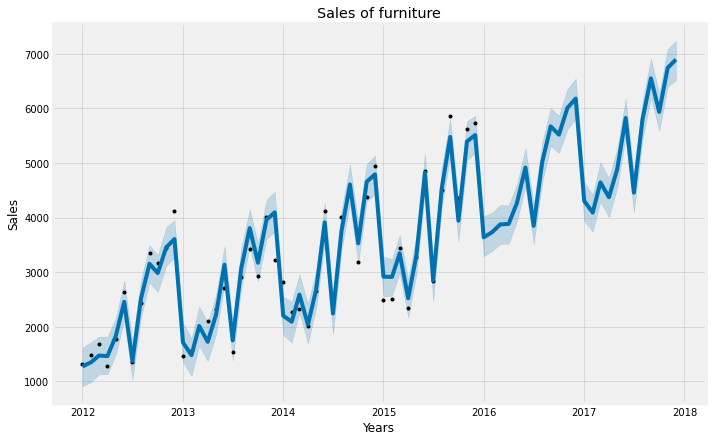

In [140]:
m_furniture.plot(forecast_furniture);
plt.title('Sales of furniture')
plt.xlabel('Years')
plt.ylabel('Sales')

In [141]:
from prophet.plot import plot_plotly, plot_components_plotly

In [142]:
plot_plotly(m_furniture, forecast_furniture)

In [143]:
plot_components_plotly(m_furniture , forecast_furniture)

**Office**

In [144]:
y_office_df = y_office.to_frame()

In [145]:
y_office_df['ds'] = y_office_df.index

In [146]:
y_office_df.columns = ['y','ds']

In [147]:
y_office_df

y         ds
Order Date                        
2012-01-01  1156.094052 2012-01-01
2012-02-01  1005.193435 2012-02-01
2012-03-01  1088.915883 2012-03-01
2012-04-01  1687.506181 2012-04-01
2012-05-01  1776.123986 2012-05-01
2012-06-01  2130.785531 2012-06-01
2012-07-01  1476.087897 2012-07-01
2012-08-01  2085.349343 2012-08-01
2012-09-01  3447.822490 2012-09-01
2012-10-01  1856.679207 2012-10-01
2012-11-01  2936.000277 2012-11-01
2012-12-01  2842.200503 2012-12-01
2013-01-01  1575.472470 2013-01-01
2013-02-01   934.513627 2013-02-01
2013-03-01  1989.677078 2013-03-01
2013-04-01  1513.312397 2013-04-01
2013-05-01  1969.785074 2013-05-01
2013-06-01  2528.194203 2013-06-01
2013-07-01  1544.880363 2013-07-01
2013-08-01  3137.412019 2013-08-01
2013-09-01  2718.764466 2013-09-01
2013-10-01  1915.584871 2013-10-01
2013-11-01  3448.951462 2013-11-01
2013-12-01  3459.491813 2013-12-01
2014-01-01  2166.122107 2014-01-01
2014-02-01  1982.803000 2014-02-01
2014-03-01  2000.253984 2014-03-01
2014-04-01  1991.632446 2014-04-01
2014-05-01  2411.485926 2014-05-01
2014-06-01  3716.287013 2014-06-01
2014-07-01  2343.035517 2014-07-01
2014-08-01  3004.831258 2014-08-01
2014-09-01  3692.055783 2014-09-01
2014-10-01  2579.760713 2014-10-01
2014-11-01  3954.849204 2014-11-01
2014-12-01  4126.651919 2014-12-01
2015-01-01  2472.706929 2015-01-01
2015-02-01  2043.852667 2015-02-01
2015-03-01  2502.460261 2015-03-01
2015-04-01  2805.925310 2015-04-01
2015-05-01  3160.480290 2015-05-01
2015-06-01  4011.332620 2015-06-01
2015-07-01  2565.712757 2015-07-01
2015-08-01  5181.025640 2015-08-01
2015-09-01  4479.550933 2015-09-01
2015-10-01  3859.030963 2015-10-01
2015-11-01  5461.710717 2015-11-01
2015-12-01  4847.696439 2015-12-01

In [148]:
y_office_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2012-01-01 to 2015-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       48 non-null     float64       
 1   ds      48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [149]:
m_office = Prophet()

In [150]:
m_office.fit(y_office_df)

19:45:42 - cmdstanpy - INFO - Chain [1] start processing
19:45:42 - cmdstanpy - INFO - Chain [1] done processing


In [151]:
future_office = m_office.make_future_dataframe(periods=24,freq='MS')

In [152]:
future_office

ds
0  2012-01-01
1  2012-02-01
2  2012-03-01
3  2012-04-01
4  2012-05-01
..        ...
67 2017-08-01
68 2017-09-01
69 2017-10-01
70 2017-11-01
71 2017-12-01

[72 rows x 1 columns]

In [153]:
forecast_office = m_office.predict(future_office)

In [154]:
forecast_office

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2012-01-01  1762.488587   756.072313  1362.977756  1762.488587   
1  2012-02-01  1797.996845   643.204226  1234.006920  1797.996845   
2  2012-03-01  1831.214247   930.693027  1527.866944  1831.214247   
3  2012-04-01  1866.722506  1100.351826  1696.170864  1866.722506   
4  2012-05-01  1901.085336  1329.110688  1922.112833  1901.085336   
..        ...          ...          ...          ...          ...   
67 2017-08-01  5399.744088  5517.046480  6152.710807  5314.356371   
68 2017-09-01  5469.272264  6020.953560  6650.320232  5376.536939   
69 2017-10-01  5536.557595  4908.155557  5510.856096  5437.010870   
70 2017-11-01  5606.085771  6239.844852  6878.383955  5499.458805   
71 2017-12-01  5673.371102  6187.912088  6837.795810  5559.722392   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   1762.488587     -700.027462           -700.027462           -700.027462   
1   1797.996845     -854.269675           -854.269675           -854.269675   
2   1831.214247     -600.443258           -600.443258           -600.443258   
3   1866.722506     -472.891568           -472.891568           -472.891568   
4   1901.085336     -271.008473           -271.008473           -271.008473   
..          ...             ...                   ...                   ...   
67  5485.027355      423.510320            423.510320            423.510320   
68  5562.766058      879.396481            879.396481            879.396481   
69  5637.070993     -325.749067           -325.749067           -325.749067   
70  5712.459636      950.647864            950.647864            950.647864   
71  5786.236380      831.908480            831.908480            831.908480   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  -700.027462   -700.027462   -700.027462                   0.0   
1  -854.269675   -854.269675   -854.269675                   0.0   
2  -600.443258   -600.443258   -600.443258                   0.0   
3  -472.891568   -472.891568   -472.891568                   0.0   
4  -271.008473   -271.008473   -271.008473                   0.0   
..         ...           ...           ...                   ...   
67  423.510320    423.510320    423.510320                   0.0   
68  879.396481    879.396481    879.396481                   0.0   
69 -325.749067   -325.749067   -325.749067                   0.0   
70  950.647864    950.647864    950.647864                   0.0   
71  831.908480    831.908480    831.908480                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                          0.0                         0.0  1062.461125  
1                          0.0                         0.0   943.727169  
2                          0.0                         0.0  1230.770989  
3                          0.0                         0.0  1393.830937  
4                          0.0                         0.0  1630.076863  
..                         ...                         ...          ...  
67                         0.0                         0.0  5823.254409  
68                         0.0                         0.0  6348.668745  
69                         0.0                         0.0  5210.808528  
70                         0.0                         0.0  6556.733634  
71                         0.0                         0.0  6505.279582  

[72 rows x 16 columns]

In [155]:
forecast_office.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [156]:
forecast_office[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

ds   yhat_lower   yhat_upper         yhat
60 2017-01-01  4093.631643  4694.161856  4380.754937
61 2017-02-01  3503.982999  4117.793738  3808.248320
62 2017-03-01  4147.075794  4736.641976  4419.262894
63 2017-04-01  4227.353662  4889.560868  4567.969145
64 2017-05-01  4584.182965  5217.373094  4890.701668
65 2017-06-01  5266.591024  5922.151454  5590.982830
66 2017-07-01  4345.177501  4985.455375  4660.698587
67 2017-08-01  5517.046480  6152.710807  5823.254409
68 2017-09-01  6020.953560  6650.320232  6348.668745
69 2017-10-01  4908.155557  5510.856096  5210.808528
70 2017-11-01  6239.844852  6878.383955  6556.733634
71 2017-12-01  6187.912088  6837.795810  6505.279582

Text(24.975, 0.5, 'Sales')

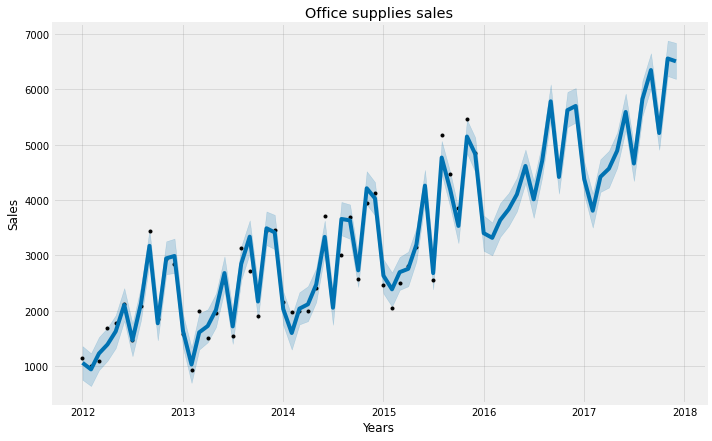

In [157]:
m_office.plot(forecast_office);
plt.title('Office supplies sales')
plt.xlabel('Years')
plt.ylabel('Sales')

In [158]:
plot_plotly(m_office, forecast_office)

In [159]:
plot_components_plotly(m_office , forecast_office)

**Technology**

In [160]:
y_technology_df = y_technology.to_frame()

In [161]:
y_technology_df['ds'] = y_technology_df.index

In [162]:
y_technology_df.columns = ['y','ds']

In [163]:
y_technology_df

y         ds
Order Date                        
2012-01-01  1236.320332 2012-01-01
2012-02-01  1740.979438 2012-02-01
2012-03-01  2366.317281 2012-03-01
2012-04-01  1523.230048 2012-04-01
2012-05-01  1957.606173 2012-05-01
2012-06-01  2661.311946 2012-06-01
2012-07-01  1580.191893 2012-07-01
2012-08-01  3024.929570 2012-08-01
2012-09-01  3126.455607 2012-09-01
2012-10-01  2804.135010 2012-10-01
2012-11-01  3903.892204 2012-11-01
2012-12-01  4063.874203 2012-12-01
2013-01-01  1693.232329 2013-01-01
2013-02-01  1605.313665 2013-02-01
2013-03-01  2087.429208 2013-03-01
2013-04-01  2230.869211 2013-04-01
2013-05-01  3012.947357 2013-05-01
2013-06-01  3661.078900 2013-06-01
2013-07-01  2125.888270 2013-07-01
2013-08-01  4329.954532 2013-08-01
2013-09-01  3812.647170 2013-09-01
2013-10-01  4182.030592 2013-10-01
2013-11-01  3686.204821 2013-11-01
2013-12-01  4627.447621 2013-12-01
2014-01-01  1746.588117 2014-01-01
2014-02-01  2357.034504 2014-02-01
2014-03-01  2545.102286 2014-03-01
2014-04-01  2409.593786 2014-04-01
2014-05-01  3977.558996 2014-05-01
2014-06-01  5854.498624 2014-06-01
2014-07-01  2926.132910 2014-07-01
2014-08-01  4173.898876 2014-08-01
2014-09-01  5313.726415 2014-09-01
2014-10-01  4524.830825 2014-10-01
2014-11-01  4843.133117 2014-11-01
2014-12-01  4477.503860 2014-12-01
2015-01-01  3386.256075 2015-01-01
2015-02-01  2997.937650 2015-02-01
2015-03-01  3422.111536 2015-03-01
2015-04-01  3028.305600 2015-04-01
2015-05-01  3070.468440 2015-05-01
2015-06-01  5191.106161 2015-06-01
2015-07-01  3312.999753 2015-07-01
2015-08-01  6246.618939 2015-08-01
2015-09-01  5896.347348 2015-09-01
2015-10-01  5876.484153 2015-10-01
2015-11-01  7675.139214 2015-11-01
2015-12-01  6036.557510 2015-12-01

In [164]:
y_technology_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2012-01-01 to 2015-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       48 non-null     float64       
 1   ds      48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [165]:
m_technology = Prophet()

In [166]:
m_technology.fit(y_technology_df)

19:45:43 - cmdstanpy - INFO - Chain [1] start processing
19:45:43 - cmdstanpy - INFO - Chain [1] done processing


In [167]:
future_technology = m_technology.make_future_dataframe(periods=24,freq='MS')

In [168]:
future_technology

ds
0  2012-01-01
1  2012-02-01
2  2012-03-01
3  2012-04-01
4  2012-05-01
..        ...
67 2017-08-01
68 2017-09-01
69 2017-10-01
70 2017-11-01
71 2017-12-01

[72 rows x 1 columns]

In [169]:
forecast_technology = m_technology.predict(future_technology)

In [170]:
forecast_technology

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2012-01-01  2319.112390   459.116336  1592.248333  2319.112390   
1  2012-02-01  2384.093382   954.152017  2100.325229  2384.093382   
2  2012-03-01  2444.882051  1185.542023  2362.240787  2444.882051   
3  2012-04-01  2509.863043   697.575260  1842.472614  2509.863043   
4  2012-05-01  2572.747874  1438.532528  2655.318850  2572.747874   
..        ...          ...          ...          ...          ...   
67 2017-08-01  6598.997522  6563.789419  7662.158461  6598.589643   
68 2017-09-01  6664.149369  6658.088671  7776.450381  6663.701483   
69 2017-10-01  6727.199544  6498.435018  7629.569142  6726.710778   
70 2017-11-01  6792.351391  7047.031496  8165.887058  6791.833438   
71 2017-12-01  6855.401565  7106.798054  8266.883195  6854.833553   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   2319.112390    -1278.439594          -1278.439594          -1278.439594   
1   2384.093382     -863.635286           -863.635286           -863.635286   
2   2444.882051     -667.818855           -667.818855           -667.818855   
3   2509.863043    -1253.973661          -1253.973661          -1253.973661   
4   2572.747874     -504.211119           -504.211119           -504.211119   
..          ...             ...                   ...                   ...   
67  6599.426340      498.168641            498.168641            498.168641   
68  6664.606867      562.595933            562.595933            562.595933   
69  6727.690001      346.179319            346.179319            346.179319   
70  6792.875384      810.112023            810.112023            810.112023   
71  6855.963745      816.811682            816.811682            816.811682   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  -1278.439594  -1278.439594  -1278.439594                   0.0   
1   -863.635286   -863.635286   -863.635286                   0.0   
2   -667.818855   -667.818855   -667.818855                   0.0   
3  -1253.973661  -1253.973661  -1253.973661                   0.0   
4   -504.211119   -504.211119   -504.211119                   0.0   
..          ...           ...           ...                   ...   
67   498.168641    498.168641    498.168641                   0.0   
68   562.595933    562.595933    562.595933                   0.0   
69   346.179319    346.179319    346.179319                   0.0   
70   810.112023    810.112023    810.112023                   0.0   
71   816.811682    816.811682    816.811682                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                          0.0                         0.0  1040.672796  
1                          0.0                         0.0  1520.458095  
2                          0.0                         0.0  1777.063196  
3                          0.0                         0.0  1255.889382  
4                          0.0                         0.0  2068.536755  
..                         ...                         ...          ...  
67                         0.0                         0.0  7097.166163  
68                         0.0                         0.0  7226.745303  
69                         0.0                         0.0  7073.378862  
70                         0.0                         0.0  7602.463414  
71                         0.0                         0.0  7672.213247  

[72 rows x 16 columns]

In [171]:
forecast_technology.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [172]:
forecast_technology[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

ds   yhat_lower   yhat_upper         yhat
60 2017-01-01  3981.197172  5059.513629  4532.066772
61 2017-02-01  3733.879193  4921.255681  4359.757652
62 2017-03-01  4779.531447  6012.507288  5399.756053
63 2017-04-01  4423.477195  5606.920624  5017.168137
64 2017-05-01  5156.071425  6285.948362  5756.862475
65 2017-06-01  6345.786114  7471.019903  6867.915103
66 2017-07-01  4700.593175  5804.163036  5260.277953
67 2017-08-01  6563.789419  7662.158461  7097.166163
68 2017-09-01  6658.088671  7776.450381  7226.745303
69 2017-10-01  6498.435018  7629.569142  7073.378862
70 2017-11-01  7047.031496  8165.887058  7602.463414
71 2017-12-01  7106.798054  8266.883195  7672.213247

Text(24.975, 0.5, 'Sales')

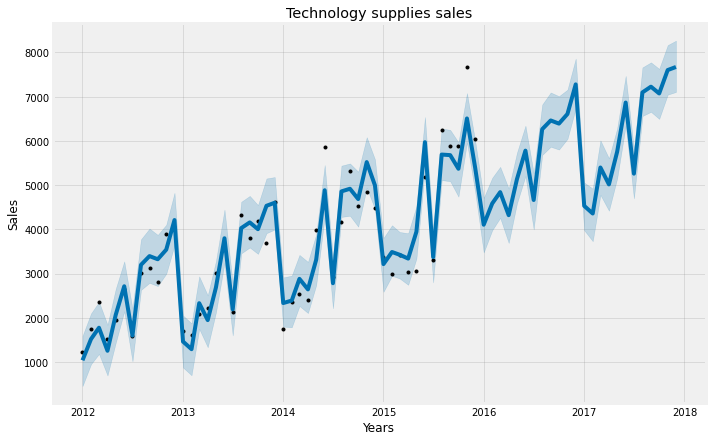

In [173]:
m_technology.plot(forecast_technology);
plt.title('Technology supplies sales')
plt.xlabel('Years')
plt.ylabel('Sales')

In [174]:
plot_plotly(m_technology, forecast_technology)

In [175]:
plot_components_plotly(m_technology , forecast_technology)